In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import pickle
import glob

from moviepy.editor import VideoFileClip
from IPython.display import HTML

from lane_finder import LaneFinder

%matplotlib inline

In [2]:
def calibrate(debug=False): #=>mtx - transf matrix, dst - dist coef
    """
    Calibrate for camera based on chessboard images in './camera_cal' folder
    This function will also save calibration results (mtx, dst) to the 'dist_pickle.p' file.
    
    
    :param debug: enable debug output
    :returns: tuple of (mtx, dist). Transformation matrix and distortion coefitients.
    """
    nx = 9
    ny = 6
    calib_imgs = glob.glob('./camera_cal/calibration*.jpg')
    
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    
    img_points=[]
    obj_points=[]
    
    # find and record chessboard corners
    for img_path in calib_imgs:
        img = mpimg.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
        
        if ret:
            obj_points.append(objp)
            img_points.append(corners)
            if debug:
                cv2.drawChessboardCorners(gray, (nx, ny), corners, ret)
                f, (pl1, pl2) = plt.subplots(1,2, figsize=(24,9))
                f.tight_layout()
                pl1.set_title(img_path)
                pl1.imshow(img)
                pl2.imshow(gray, cmap='gray')
                plt.show()
        elif debug:
            print('Corners not found for ', img_path)
    
    
    # get camera calibration parameters based on detected artifacts
    ret, mtx, dst, rvec, tvec = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    print('Dist coefs: ', dst)
    
    #save calibration information to file
    dist_pickle = {}
    dist_pickle['mtx'] = mtx
    dist_pickle['dst'] = dst
    pickle.dump(dist_pickle, open( "dist_pickle.p", "wb" ))
    
    return mtx, dst

#calibrate(debug=True)

In [2]:
# Loading calibration data from file
# It can be regenerated by calling calibrate() function

with  open( "./dist_pickle.p", "rb" ) as f:    
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dst"]
    
print(dist)

[[ -2.35510339e-01  -7.90388401e-02  -1.28492203e-03   8.25970403e-05
    7.22743173e-02]]


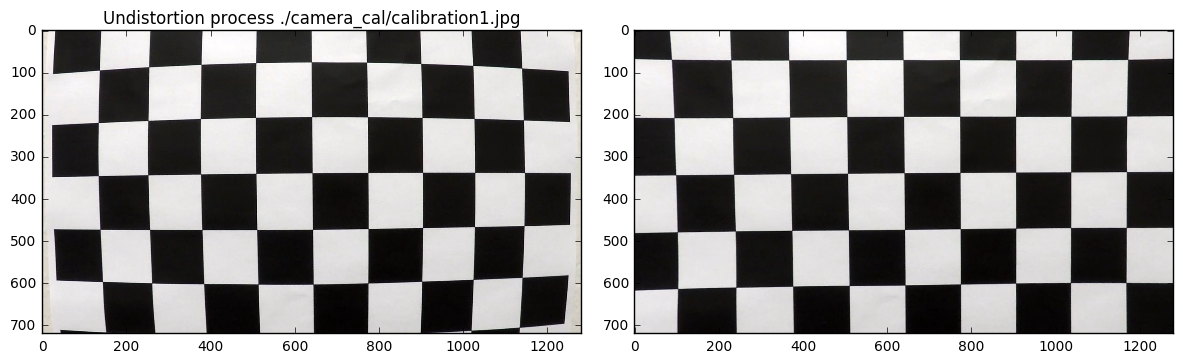

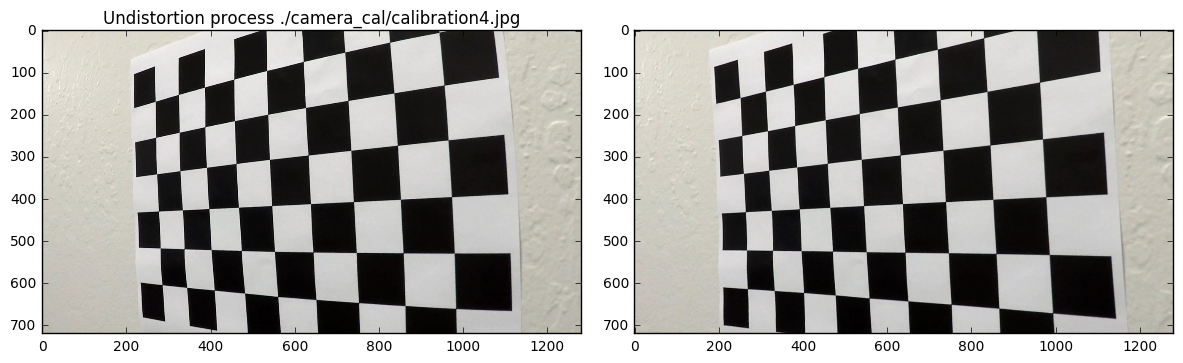

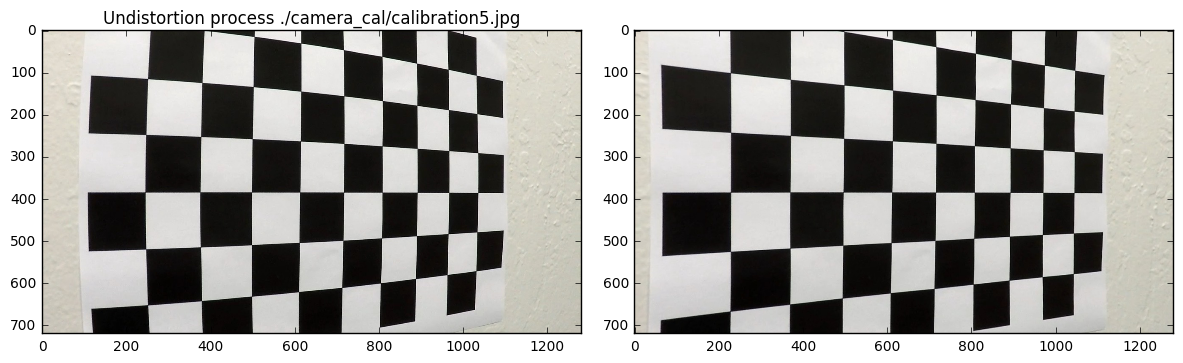

In [4]:
# test undistortion with 1 chessboard and test images

dist_valid_imgs = ['./camera_cal/calibration1.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration5.jpg']
def plot_undistortions(img_arr):
    for path in img_arr:

        test_img = mpimg.imread(path)

        undist = cv2.undistort(test_img, mtx, dist, None, None)

        f, (pl1, pl2) = plt.subplots(1,2, figsize=(12,4))
        f.tight_layout()
        pl1.set_title('Undistortion process '+ path)
        pl1.imshow(test_img)
        pl2.imshow(undist)
        plt.show()
plot_undistortions(dist_valid_imgs)

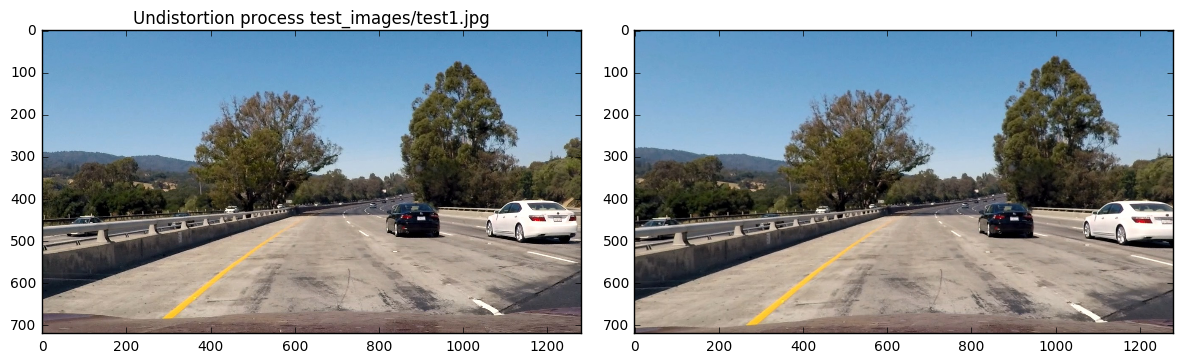

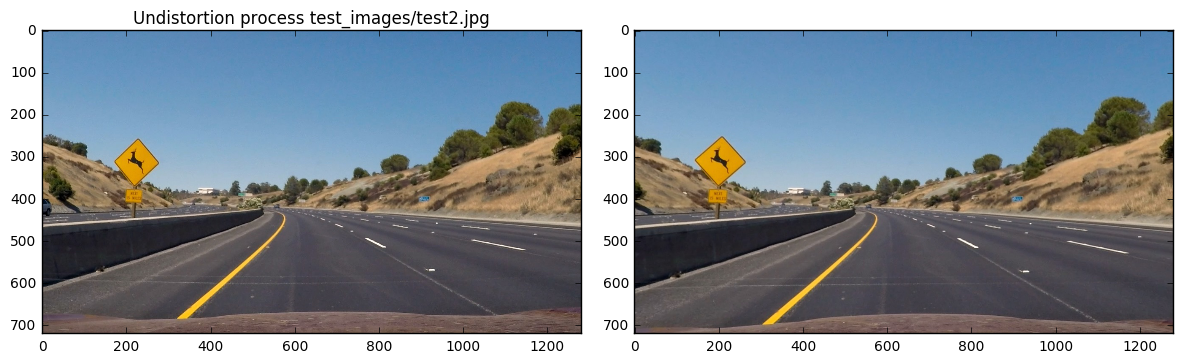

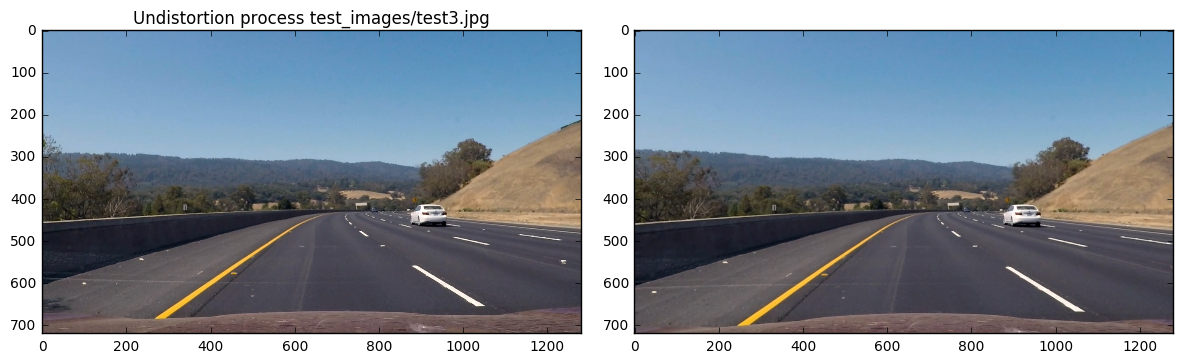

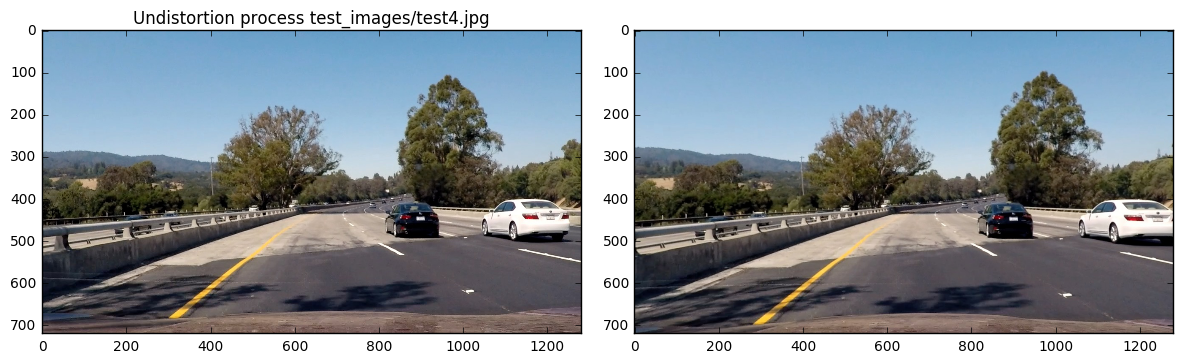

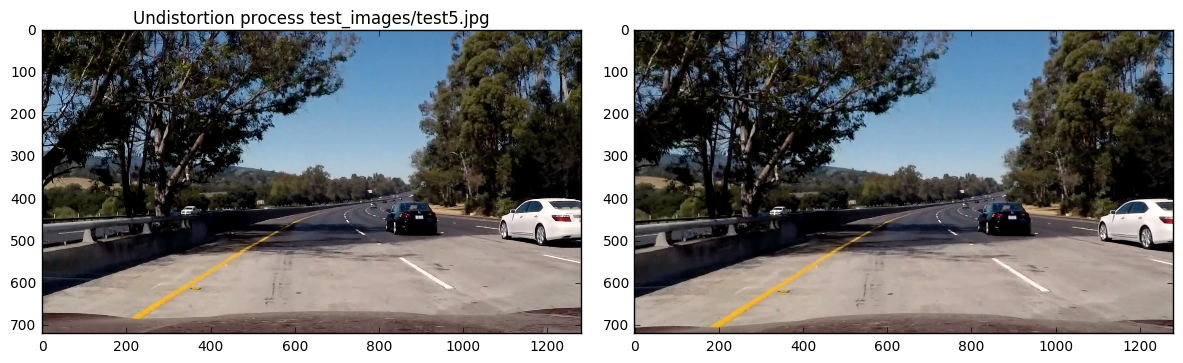

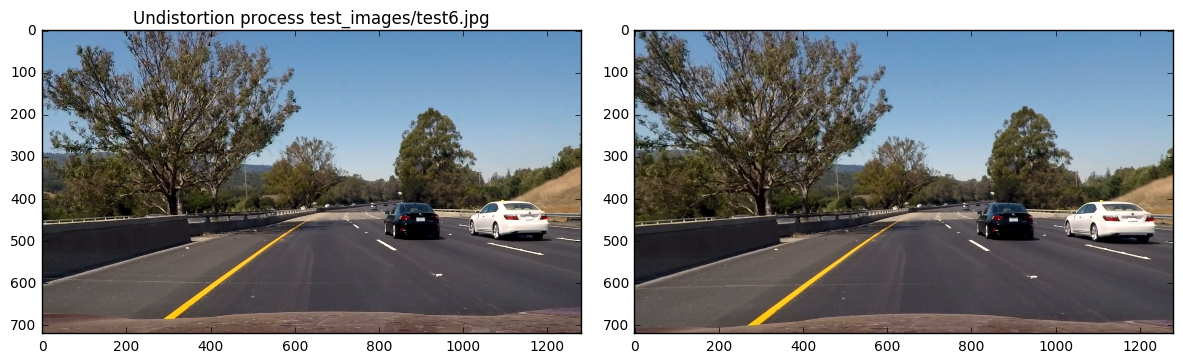

In [5]:
# For Test purposes display undistorted images from test folder

test_imgs = glob.glob('test_images/test*.jpg')
plot_undistortions(test_imgs)

### Image transformation 
Now lets transform our images from pipleline to a top-down view.

In [3]:

    

def plot_image_pair(im1, title1, im2, title2='', cmap2='hsv'):
    """
    Plot pair of images side by side.
    :param im1: left image array
    :param title1: title for left image
    :param im2: right image
    :param title2: right title
    """
    f, (pl1, pl2) = plt.subplots(1,2, figsize=(12,4))
    f.tight_layout()
    pl1.set_title(title1)
    pl1.imshow(im1)
    pl2.imshow(im2, cmap=cmap2)
    pl2.set_title(title2)
    plt.show()

Starting lane search from left=314, right=1088
Win height: 72, n_windows=10
left_center_x=314
win_y=720, left_center_x=327, right_center_x=1109
win_y=648, left_center_x=323, right_center_x=1101
win_y=576, left_center_x=333, right_center_x=1103
win_y=504, left_center_x=339, right_center_x=1099
win_y=432, left_center_x=336, right_center_x=1023
win_y=360, left_center_x=338, right_center_x=1023
win_y=288, left_center_x=347, right_center_x=1023
win_y=216, left_center_x=363, right_center_x=1023
win_y=144, left_center_x=373, right_center_x=1023
win_y=72, left_center_x=384, right_center_x=1023


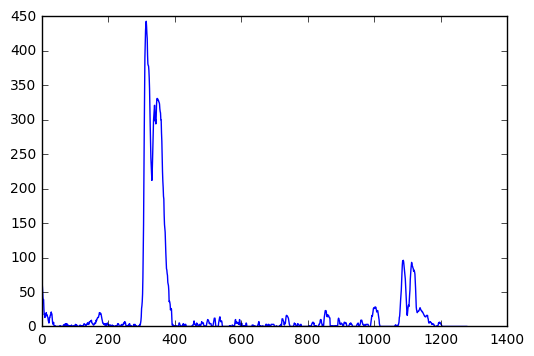

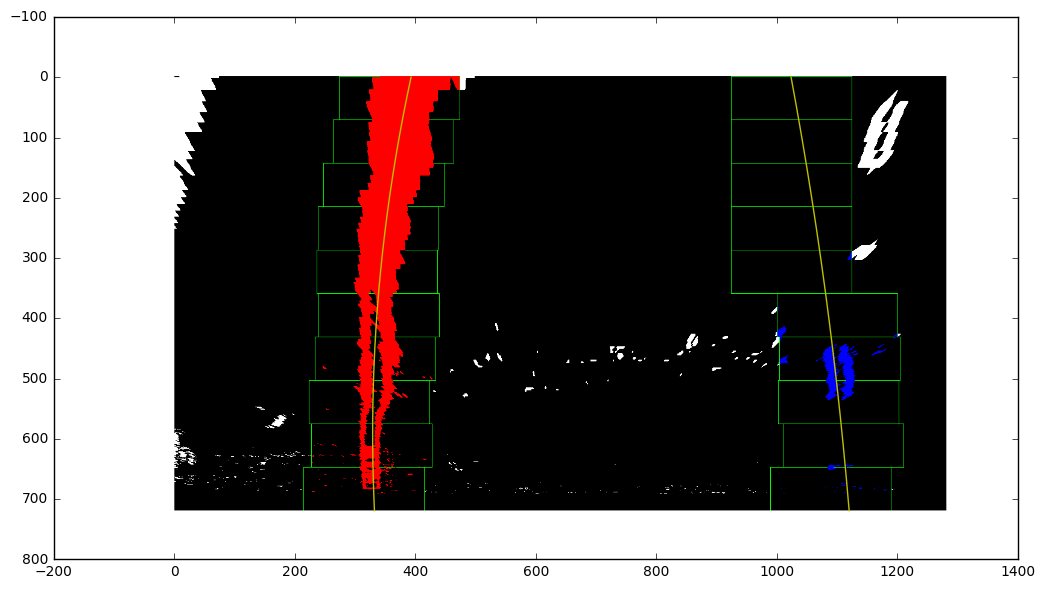

Radius l=969.9022412992888, r=2487.6500558637863


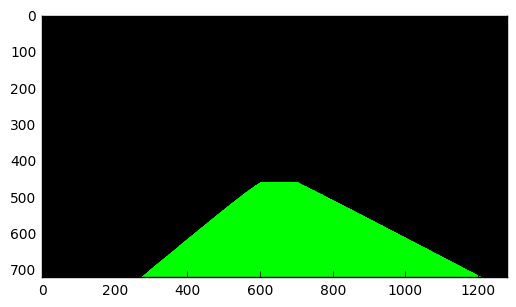

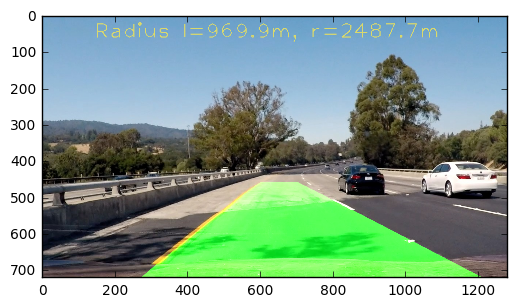

In [5]:
# Just run processing test in Debug mode for one image
ln_finder = LaneFinder(mtx, dist)
tst_img = mpimg.imread('./test_images/test4.jpg')
#comb = undistort_transform(tst_img, mtx, dist, M)
comb = ln_finder.processImage(tst_img, debug=True)
# src_pt1 = np.array([(704, 460), (580, 460), (273, 672), (1032, 672)], np.int_)
# cv2.polylines(tst_img, [src_pt1], True, (255, 0, 0))
# mpimg.imsave('./output_images/rect-s2-50.jpg', comb)

# M = getTransformationMatrix(top_y=50)
# comb2 = undistort_transform(tst_img, mtx, dist, M)
# plot_image_pair(comb, '150', comb2, '50')
# mpimg.imsave('./output_images/rect-y50.jpg', comb2)

# M0 = getTransformationMatrix(top_y=0)
# comb0 = undistort_transform(tst_img, mtx, dist, M0)
# M250 = getTransformationMatrix(top_y=250)
# comb250 = undistort_transform(tst_img, mtx, dist, M250)
# plot_image_pair(comb0, '0', comb250, '250')
# mpimg.imsave('./output_images/rect-y0.jpg', comb0)
# mpimg.imsave('./output_images/rect-y250.jpg', comb250)




plt.imshow(comb)
plt.show()
# findLaneLines(comb, True)

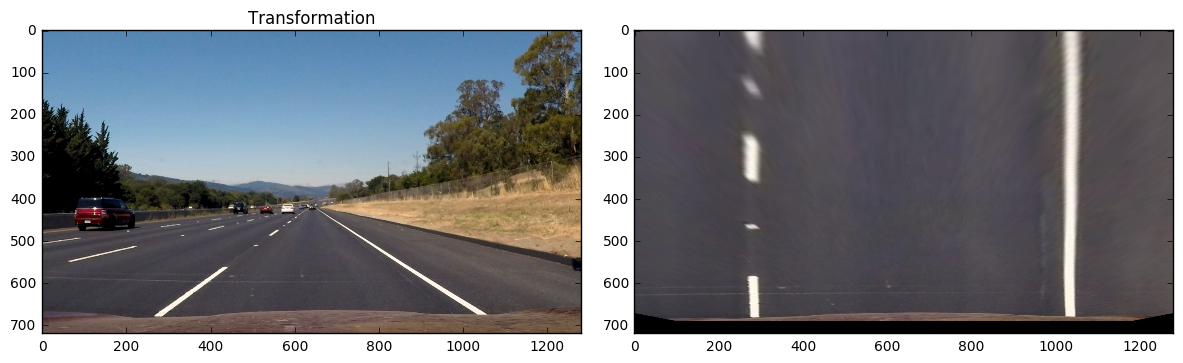

In [17]:
# test for transformation to show some output
tst_img = mpimg.imread('./test_images/straight_lines2.jpg')
comb = undistort_transform(tst_img, mtx, dist, M)
plot_image_pair(tst_img, 'Transformation', comb)

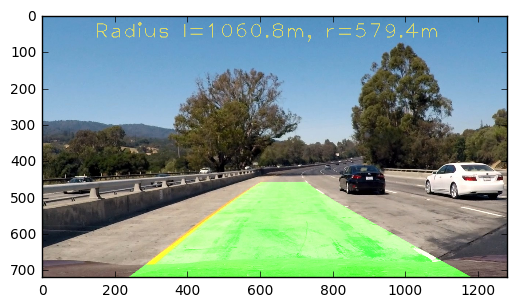

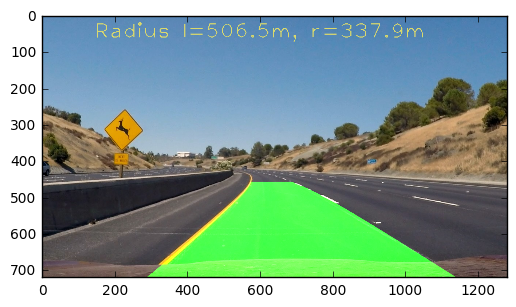

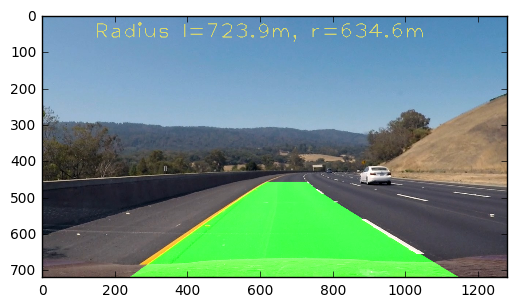

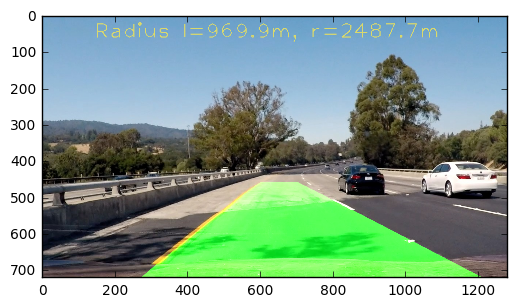

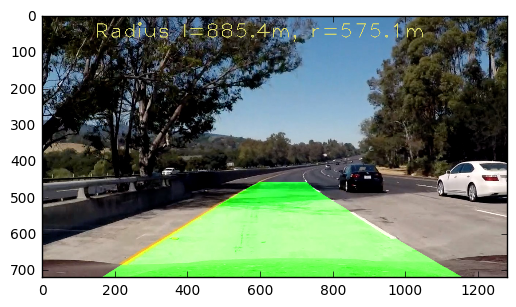

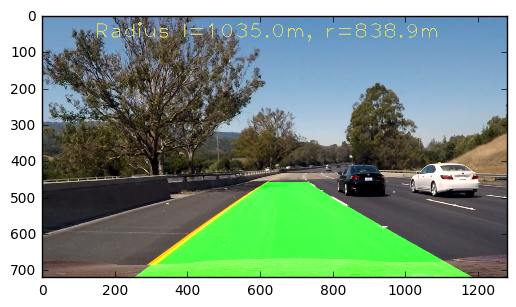

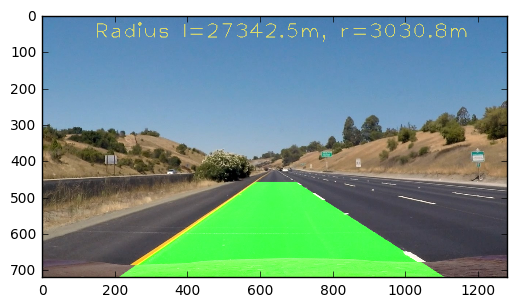

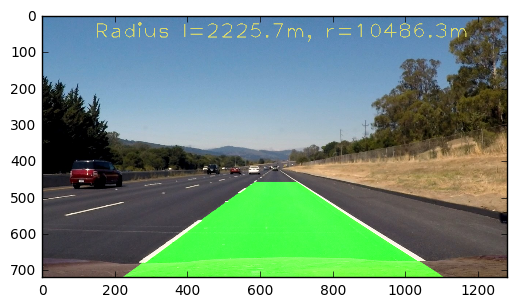

In [12]:
# Display set of processed images from test folder

paths = glob.glob('./test_images/test*.jpg')
paths.append('./test_images/straight_lines1.jpg')
paths.append('./test_images/straight_lines2.jpg')



for path in paths:
    im = mpimg.imread(path)
    
    plt.imshow(processImage(im))
    plt.show()

In [11]:
# Execute processing with video file and save it to output folder

vid_output = './output_images/vid_harder_out.mp4'
clip1 = VideoFileClip("harder_challenge_video.mp4", audio=False)#.cutout(0, 37)
clip = clip1.fl_image(processImage) 

%time clip.write_videofile(vid_output, audio=False)

[MoviePy] >>>> Building video ./output_images/vid_harder_out.mp4


[MoviePy] Writing video ./output_images/vid_harder_out.mp4


  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 1/1200 [00:00<13:27,  1.48it/s]

  0%|          | 2/1200 [00:01<14:24,  1.39it/s]

  0%|          | 3/1200 [00:01<12:46,  1.56it/s]

  0%|          | 4/1200 [00:02<11:07,  1.79it/s]

  0%|          | 5/1200 [00:02<09:52,  2.02it/s]

  0%|          | 6/1200 [00:03<09:03,  2.20it/s]

  1%|          | 7/1200 [00:03<07:57,  2.50it/s]

  1%|          | 8/1200 [00:03<07:40,  2.59it/s]

  1%|          | 9/1200 [00:03<06:52,  2.89it/s]

  1%|          | 10/1200 [00:04<06:16,  3.16it/s]

  1%|          | 11/1200 [00:04<06:07,  3.24it/s]

  1%|          | 12/1200 [00:04<05:53,  3.37it/s]

  1%|          | 13/1200 [00:04<05:35,  3.54it/s]

  1%|          | 14/1200 [00:05<05:25,  3.64it/s]

  1%|▏         | 15/1200 [00:05<05:25,  3.65it/s]

  1%|▏         | 16/1200 [00:05<05:39,  3.48it/s]

  1%|▏         | 17/1200 [00:06<05:44,  3.43it/s]

  2%|▏         | 18/1200 [00:06<05:28,  3.60it/s]

  2%|▏         | 19/1200 [00:06<05:40,  3.47it/s]

  2%|▏         | 20/1200 [00:06<05:32,  3.54it/s]

  2%|▏         | 21/1200 [00:07<05:36,  3.50it/s]

  2%|▏         | 22/1200 [00:07<05:47,  3.39it/s]

  2%|▏         | 23/1200 [00:07<05:44,  3.42it/s]

  2%|▏         | 24/1200 [00:08<05:57,  3.29it/s]

  2%|▏         | 25/1200 [00:08<07:19,  2.67it/s]

  2%|▏         | 26/1200 [00:09<09:02,  2.16it/s]

  2%|▏         | 27/1200 [00:10<11:40,  1.67it/s]

  2%|▏         | 28/1200 [00:11<12:45,  1.53it/s]

  2%|▏         | 29/1200 [00:11<13:59,  1.40it/s]

  2%|▎         | 30/1200 [00:12<13:14,  1.47it/s]

  3%|▎         | 31/1200 [00:13<13:18,  1.46it/s]

  3%|▎         | 32/1200 [00:13<12:32,  1.55it/s]

  3%|▎         | 33/1200 [00:14<11:45,  1.65it/s]

  3%|▎         | 34/1200 [00:14<11:04,  1.75it/s]

  3%|▎         | 35/1200 [00:15<09:27,  2.05it/s]

  3%|▎         | 36/1200 [00:15<08:41,  2.23it/s]

  3%|▎         | 37/1200 [00:15<08:17,  2.34it/s]

  3%|▎         | 38/1200 [00:16<07:59,  2.42it/s]

  3%|▎         | 39/1200 [00:16<07:43,  2.51it/s]

  3%|▎         | 40/1200 [00:16<07:11,  2.69it/s]

  3%|▎         | 41/1200 [00:17<07:07,  2.71it/s]

  4%|▎         | 42/1200 [00:17<06:58,  2.77it/s]

  4%|▎         | 43/1200 [00:17<07:00,  2.75it/s]

  4%|▎         | 44/1200 [00:18<06:55,  2.78it/s]

  4%|▍         | 45/1200 [00:18<06:48,  2.83it/s]

  4%|▍         | 46/1200 [00:18<06:43,  2.86it/s]

  4%|▍         | 47/1200 [00:19<07:10,  2.68it/s]

  4%|▍         | 48/1200 [00:19<08:07,  2.36it/s]

  4%|▍         | 49/1200 [00:20<09:37,  1.99it/s]

  4%|▍         | 50/1200 [00:21<10:15,  1.87it/s]

  4%|▍         | 51/1200 [00:22<12:25,  1.54it/s]

  4%|▍         | 52/1200 [00:23<15:08,  1.26it/s]

  4%|▍         | 53/1200 [00:23<13:34,  1.41it/s]

  4%|▍         | 54/1200 [00:24<12:36,  1.52it/s]

  5%|▍         | 55/1200 [00:24<11:28,  1.66it/s]

  5%|▍         | 56/1200 [00:25<11:02,  1.73it/s]

  5%|▍         | 57/1200 [00:25<09:57,  1.91it/s]

  5%|▍         | 58/1200 [00:26<09:05,  2.09it/s]

  5%|▍         | 59/1200 [00:26<08:44,  2.17it/s]

  5%|▌         | 60/1200 [00:26<08:38,  2.20it/s]

  5%|▌         | 61/1200 [00:27<08:18,  2.28it/s]

  5%|▌         | 62/1200 [00:27<08:24,  2.26it/s]

  5%|▌         | 63/1200 [00:28<09:58,  1.90it/s]

  5%|▌         | 64/1200 [00:28<09:28,  2.00it/s]

  5%|▌         | 65/1200 [00:29<09:10,  2.06it/s]

  6%|▌         | 66/1200 [00:29<08:17,  2.28it/s]

  6%|▌         | 67/1200 [00:30<07:28,  2.53it/s]

  6%|▌         | 68/1200 [00:30<07:24,  2.55it/s]

  6%|▌         | 69/1200 [00:30<07:08,  2.64it/s]

  6%|▌         | 70/1200 [00:31<06:41,  2.81it/s]

  6%|▌         | 71/1200 [00:31<06:40,  2.82it/s]

  6%|▌         | 72/1200 [00:31<06:25,  2.92it/s]

  6%|▌         | 73/1200 [00:32<06:41,  2.81it/s]

  6%|▌         | 74/1200 [00:32<07:16,  2.58it/s]

  6%|▋         | 75/1200 [00:32<06:55,  2.71it/s]

  6%|▋         | 76/1200 [00:33<08:42,  2.15it/s]

  6%|▋         | 77/1200 [00:34<08:29,  2.21it/s]

  6%|▋         | 78/1200 [00:34<09:34,  1.95it/s]

  7%|▋         | 79/1200 [00:35<08:30,  2.19it/s]

  7%|▋         | 80/1200 [00:35<07:27,  2.50it/s]

  7%|▋         | 81/1200 [00:35<07:13,  2.58it/s]

  7%|▋         | 82/1200 [00:35<06:49,  2.73it/s]

  7%|▋         | 83/1200 [00:36<06:15,  2.97it/s]

  7%|▋         | 84/1200 [00:36<05:51,  3.17it/s]

  7%|▋         | 85/1200 [00:36<05:52,  3.16it/s]

  7%|▋         | 86/1200 [00:37<05:38,  3.29it/s]

  7%|▋         | 87/1200 [00:37<05:23,  3.44it/s]

  7%|▋         | 88/1200 [00:37<05:11,  3.56it/s]

  7%|▋         | 89/1200 [00:37<05:04,  3.64it/s]

  8%|▊         | 90/1200 [00:38<05:03,  3.66it/s]

  8%|▊         | 91/1200 [00:38<05:02,  3.67it/s]

  8%|▊         | 92/1200 [00:38<04:51,  3.80it/s]

  8%|▊         | 93/1200 [00:38<04:44,  3.90it/s]

  8%|▊         | 94/1200 [00:39<04:42,  3.92it/s]

  8%|▊         | 95/1200 [00:39<06:24,  2.87it/s]

  8%|▊         | 96/1200 [00:40<07:15,  2.53it/s]

  8%|▊         | 97/1200 [00:40<07:46,  2.36it/s]

  8%|▊         | 98/1200 [00:41<07:27,  2.46it/s]

  8%|▊         | 99/1200 [00:41<07:02,  2.61it/s]

  8%|▊         | 100/1200 [00:41<06:51,  2.67it/s]

  8%|▊         | 101/1200 [00:42<06:43,  2.72it/s]

  8%|▊         | 102/1200 [00:42<06:29,  2.82it/s]

  9%|▊         | 103/1200 [00:42<06:07,  2.99it/s]

  9%|▊         | 104/1200 [00:42<05:44,  3.18it/s]

  9%|▉         | 105/1200 [00:43<05:24,  3.37it/s]

  9%|▉         | 106/1200 [00:43<05:15,  3.47it/s]

  9%|▉         | 107/1200 [00:43<05:12,  3.49it/s]

  9%|▉         | 108/1200 [00:44<05:17,  3.44it/s]

  9%|▉         | 109/1200 [00:44<05:04,  3.58it/s]

  9%|▉         | 110/1200 [00:44<04:50,  3.75it/s]

  9%|▉         | 111/1200 [00:44<04:44,  3.83it/s]

  9%|▉         | 112/1200 [00:45<04:38,  3.91it/s]

  9%|▉         | 113/1200 [00:45<04:38,  3.91it/s]

 10%|▉         | 114/1200 [00:45<04:28,  4.05it/s]

 10%|▉         | 115/1200 [00:45<04:29,  4.03it/s]

 10%|▉         | 116/1200 [00:46<04:29,  4.02it/s]

 10%|▉         | 117/1200 [00:46<04:28,  4.03it/s]

 10%|▉         | 118/1200 [00:46<04:31,  3.99it/s]

 10%|▉         | 119/1200 [00:46<04:28,  4.02it/s]

 10%|█         | 120/1200 [00:47<04:25,  4.06it/s]

 10%|█         | 121/1200 [00:47<04:26,  4.05it/s]

 10%|█         | 122/1200 [00:47<04:24,  4.08it/s]

 10%|█         | 123/1200 [00:47<04:20,  4.13it/s]

 10%|█         | 124/1200 [00:47<04:17,  4.17it/s]

 10%|█         | 125/1200 [00:48<04:17,  4.17it/s]

 10%|█         | 126/1200 [00:48<04:21,  4.11it/s]

 11%|█         | 127/1200 [00:48<04:23,  4.08it/s]

 11%|█         | 128/1200 [00:48<04:23,  4.07it/s]

 11%|█         | 129/1200 [00:49<04:16,  4.17it/s]

 11%|█         | 130/1200 [00:49<04:16,  4.17it/s]

 11%|█         | 131/1200 [00:49<04:45,  3.74it/s]

 11%|█         | 132/1200 [00:50<04:44,  3.76it/s]

 11%|█         | 133/1200 [00:50<05:06,  3.48it/s]

 11%|█         | 134/1200 [00:50<05:27,  3.25it/s]

 11%|█▏        | 135/1200 [00:50<05:09,  3.44it/s]

 11%|█▏        | 136/1200 [00:51<04:56,  3.59it/s]

 11%|█▏        | 137/1200 [00:51<05:23,  3.28it/s]

 12%|█▏        | 138/1200 [00:52<06:04,  2.91it/s]

 12%|█▏        | 139/1200 [00:52<06:11,  2.86it/s]

 12%|█▏        | 140/1200 [00:52<06:06,  2.90it/s]

 12%|█▏        | 141/1200 [00:52<05:37,  3.14it/s]

 12%|█▏        | 142/1200 [00:53<05:22,  3.29it/s]

 12%|█▏        | 143/1200 [00:53<05:03,  3.48it/s]

 12%|█▏        | 144/1200 [00:53<04:46,  3.69it/s]

 12%|█▏        | 145/1200 [00:53<04:39,  3.78it/s]

 12%|█▏        | 146/1200 [00:54<04:25,  3.97it/s]

 12%|█▏        | 147/1200 [00:54<04:24,  3.97it/s]

 12%|█▏        | 148/1200 [00:54<04:22,  4.01it/s]

 12%|█▏        | 149/1200 [00:54<04:26,  3.94it/s]

 12%|█▎        | 150/1200 [00:55<04:21,  4.02it/s]

 13%|█▎        | 151/1200 [00:55<04:25,  3.94it/s]

 13%|█▎        | 152/1200 [00:55<04:19,  4.03it/s]

 13%|█▎        | 153/1200 [00:55<04:22,  3.99it/s]

 13%|█▎        | 154/1200 [00:56<05:09,  3.38it/s]

 13%|█▎        | 155/1200 [00:56<05:34,  3.12it/s]

 13%|█▎        | 156/1200 [00:56<05:07,  3.40it/s]

 13%|█▎        | 157/1200 [00:57<04:51,  3.58it/s]

 13%|█▎        | 158/1200 [00:57<04:41,  3.71it/s]

 13%|█▎        | 159/1200 [00:57<05:21,  3.24it/s]

 13%|█▎        | 160/1200 [00:58<05:52,  2.95it/s]

 13%|█▎        | 161/1200 [00:58<06:08,  2.82it/s]

 14%|█▎        | 162/1200 [00:58<05:49,  2.97it/s]

 14%|█▎        | 163/1200 [00:59<05:24,  3.19it/s]

 14%|█▎        | 164/1200 [00:59<04:58,  3.47it/s]

 14%|█▍        | 165/1200 [00:59<04:54,  3.52it/s]

 14%|█▍        | 166/1200 [00:59<04:43,  3.64it/s]

 14%|█▍        | 167/1200 [01:00<04:34,  3.76it/s]

 14%|█▍        | 168/1200 [01:00<04:25,  3.89it/s]

 14%|█▍        | 169/1200 [01:00<04:20,  3.96it/s]

 14%|█▍        | 170/1200 [01:00<04:11,  4.10it/s]

 14%|█▍        | 171/1200 [01:01<04:14,  4.04it/s]

 14%|█▍        | 172/1200 [01:01<04:10,  4.10it/s]

 14%|█▍        | 173/1200 [01:01<04:16,  4.00it/s]

 14%|█▍        | 174/1200 [01:01<04:06,  4.16it/s]

 15%|█▍        | 175/1200 [01:02<04:11,  4.08it/s]

 15%|█▍        | 176/1200 [01:02<04:03,  4.20it/s]

 15%|█▍        | 177/1200 [01:02<04:01,  4.24it/s]

 15%|█▍        | 178/1200 [01:02<03:56,  4.32it/s]

 15%|█▍        | 179/1200 [01:03<03:57,  4.30it/s]

 15%|█▌        | 180/1200 [01:03<03:53,  4.36it/s]

 15%|█▌        | 181/1200 [01:03<04:05,  4.16it/s]

 15%|█▌        | 182/1200 [01:03<04:04,  4.17it/s]

 15%|█▌        | 183/1200 [01:04<04:08,  4.10it/s]

 15%|█▌        | 184/1200 [01:04<04:04,  4.16it/s]

 15%|█▌        | 185/1200 [01:04<03:59,  4.24it/s]

 16%|█▌        | 186/1200 [01:04<03:58,  4.25it/s]

 16%|█▌        | 187/1200 [01:04<03:53,  4.33it/s]

 16%|█▌        | 188/1200 [01:05<03:57,  4.27it/s]

 16%|█▌        | 189/1200 [01:05<03:54,  4.31it/s]

 16%|█▌        | 190/1200 [01:05<03:52,  4.34it/s]

 16%|█▌        | 191/1200 [01:05<03:58,  4.23it/s]

 16%|█▌        | 192/1200 [01:06<03:57,  4.24it/s]

 16%|█▌        | 193/1200 [01:06<04:00,  4.19it/s]

 16%|█▌        | 194/1200 [01:06<04:07,  4.06it/s]

 16%|█▋        | 195/1200 [01:06<04:07,  4.06it/s]

 16%|█▋        | 196/1200 [01:07<04:05,  4.09it/s]

 16%|█▋        | 197/1200 [01:07<04:00,  4.17it/s]

 16%|█▋        | 198/1200 [01:07<03:58,  4.21it/s]

 17%|█▋        | 199/1200 [01:07<03:58,  4.19it/s]

 17%|█▋        | 200/1200 [01:08<03:59,  4.18it/s]

 17%|█▋        | 201/1200 [01:08<04:01,  4.13it/s]

 17%|█▋        | 202/1200 [01:08<04:00,  4.14it/s]

 17%|█▋        | 203/1200 [01:08<04:02,  4.11it/s]

 17%|█▋        | 204/1200 [01:09<04:12,  3.94it/s]

 17%|█▋        | 205/1200 [01:09<04:24,  3.76it/s]

 17%|█▋        | 206/1200 [01:09<04:43,  3.51it/s]

 17%|█▋        | 207/1200 [01:10<04:52,  3.40it/s]

 17%|█▋        | 208/1200 [01:10<04:53,  3.38it/s]

 17%|█▋        | 209/1200 [01:10<04:51,  3.39it/s]

 18%|█▊        | 210/1200 [01:10<04:46,  3.46it/s]

 18%|█▊        | 211/1200 [01:11<04:54,  3.36it/s]

 18%|█▊        | 212/1200 [01:11<04:52,  3.37it/s]

 18%|█▊        | 213/1200 [01:11<04:49,  3.41it/s]

 18%|█▊        | 214/1200 [01:12<04:47,  3.43it/s]

 18%|█▊        | 215/1200 [01:12<04:53,  3.35it/s]

 18%|█▊        | 216/1200 [01:12<04:57,  3.31it/s]

 18%|█▊        | 217/1200 [01:13<04:59,  3.28it/s]

 18%|█▊        | 218/1200 [01:13<04:58,  3.29it/s]

 18%|█▊        | 219/1200 [01:13<04:55,  3.32it/s]

 18%|█▊        | 220/1200 [01:13<05:03,  3.23it/s]

 18%|█▊        | 221/1200 [01:14<05:10,  3.16it/s]

 18%|█▊        | 222/1200 [01:14<05:27,  2.99it/s]

 19%|█▊        | 223/1200 [01:14<05:20,  3.05it/s]

 19%|█▊        | 224/1200 [01:15<05:22,  3.03it/s]

 19%|█▉        | 225/1200 [01:15<05:33,  2.92it/s]

 19%|█▉        | 226/1200 [01:15<05:22,  3.02it/s]

 19%|█▉        | 227/1200 [01:16<05:13,  3.10it/s]

 19%|█▉        | 228/1200 [01:16<05:03,  3.20it/s]

 19%|█▉        | 229/1200 [01:16<05:03,  3.20it/s]

 19%|█▉        | 230/1200 [01:17<05:22,  3.01it/s]

 19%|█▉        | 231/1200 [01:17<05:22,  3.00it/s]

 19%|█▉        | 232/1200 [01:17<05:25,  2.98it/s]

 19%|█▉        | 233/1200 [01:18<05:13,  3.08it/s]

 20%|█▉        | 234/1200 [01:18<05:10,  3.11it/s]

 20%|█▉        | 235/1200 [01:18<05:11,  3.09it/s]

 20%|█▉        | 236/1200 [01:19<05:15,  3.05it/s]

 20%|█▉        | 237/1200 [01:19<05:13,  3.07it/s]

 20%|█▉        | 238/1200 [01:19<05:20,  3.00it/s]

 20%|█▉        | 239/1200 [01:20<05:29,  2.92it/s]

 20%|██        | 240/1200 [01:20<05:34,  2.87it/s]

 20%|██        | 241/1200 [01:21<06:16,  2.55it/s]

 20%|██        | 242/1200 [01:21<06:11,  2.58it/s]

 20%|██        | 243/1200 [01:21<06:03,  2.63it/s]

 20%|██        | 244/1200 [01:22<06:54,  2.30it/s]

 20%|██        | 245/1200 [01:23<07:47,  2.04it/s]

 20%|██        | 246/1200 [01:23<07:22,  2.16it/s]

 21%|██        | 247/1200 [01:23<06:41,  2.38it/s]

 21%|██        | 248/1200 [01:24<06:29,  2.44it/s]

 21%|██        | 249/1200 [01:24<06:14,  2.54it/s]

 21%|██        | 250/1200 [01:24<06:02,  2.62it/s]

 21%|██        | 251/1200 [01:25<05:47,  2.73it/s]

 21%|██        | 252/1200 [01:25<05:37,  2.81it/s]

 21%|██        | 253/1200 [01:25<05:27,  2.89it/s]

 21%|██        | 254/1200 [01:26<05:27,  2.89it/s]

 21%|██▏       | 255/1200 [01:26<05:21,  2.94it/s]

 21%|██▏       | 256/1200 [01:26<05:14,  3.01it/s]

 21%|██▏       | 257/1200 [01:27<05:07,  3.06it/s]

 22%|██▏       | 258/1200 [01:27<06:22,  2.46it/s]

 22%|██▏       | 259/1200 [01:28<06:47,  2.31it/s]

 22%|██▏       | 260/1200 [01:28<06:43,  2.33it/s]

 22%|██▏       | 261/1200 [01:28<06:11,  2.52it/s]

 22%|██▏       | 262/1200 [01:29<05:52,  2.66it/s]

 22%|██▏       | 263/1200 [01:29<05:32,  2.82it/s]

 22%|██▏       | 264/1200 [01:29<05:14,  2.97it/s]

 22%|██▏       | 265/1200 [01:30<05:07,  3.04it/s]

 22%|██▏       | 266/1200 [01:30<05:00,  3.11it/s]

 22%|██▏       | 267/1200 [01:30<04:57,  3.14it/s]

 22%|██▏       | 268/1200 [01:31<04:50,  3.21it/s]

 22%|██▏       | 269/1200 [01:31<04:42,  3.29it/s]

 22%|██▎       | 270/1200 [01:31<04:39,  3.33it/s]

 23%|██▎       | 271/1200 [01:31<04:36,  3.36it/s]

 23%|██▎       | 272/1200 [01:32<04:35,  3.36it/s]

 23%|██▎       | 273/1200 [01:32<04:29,  3.44it/s]

 23%|██▎       | 274/1200 [01:32<04:22,  3.53it/s]

 23%|██▎       | 275/1200 [01:33<04:22,  3.52it/s]

 23%|██▎       | 276/1200 [01:33<04:24,  3.50it/s]

 23%|██▎       | 277/1200 [01:33<04:19,  3.55it/s]

 23%|██▎       | 278/1200 [01:33<04:17,  3.58it/s]

 23%|██▎       | 279/1200 [01:34<04:09,  3.69it/s]

 23%|██▎       | 280/1200 [01:34<04:03,  3.77it/s]

 23%|██▎       | 281/1200 [01:34<03:56,  3.88it/s]

 24%|██▎       | 282/1200 [01:34<03:51,  3.96it/s]

 24%|██▎       | 283/1200 [01:35<03:49,  4.00it/s]

 24%|██▎       | 284/1200 [01:35<03:45,  4.06it/s]

 24%|██▍       | 285/1200 [01:35<03:41,  4.14it/s]

 24%|██▍       | 286/1200 [01:35<03:36,  4.23it/s]

 24%|██▍       | 287/1200 [01:36<03:34,  4.26it/s]

 24%|██▍       | 288/1200 [01:36<03:37,  4.20it/s]

 24%|██▍       | 289/1200 [01:36<03:35,  4.23it/s]

 24%|██▍       | 290/1200 [01:36<03:39,  4.14it/s]

 24%|██▍       | 291/1200 [01:37<03:36,  4.21it/s]

 24%|██▍       | 292/1200 [01:37<03:37,  4.18it/s]

 24%|██▍       | 293/1200 [01:37<03:41,  4.10it/s]

 24%|██▍       | 294/1200 [01:37<03:40,  4.11it/s]

 25%|██▍       | 295/1200 [01:38<03:40,  4.10it/s]

 25%|██▍       | 296/1200 [01:38<03:41,  4.08it/s]

 25%|██▍       | 297/1200 [01:38<03:38,  4.13it/s]

 25%|██▍       | 298/1200 [01:38<03:35,  4.18it/s]

 25%|██▍       | 299/1200 [01:38<03:35,  4.19it/s]

 25%|██▌       | 300/1200 [01:39<03:30,  4.28it/s]

 25%|██▌       | 301/1200 [01:39<03:34,  4.19it/s]

 25%|██▌       | 302/1200 [01:39<03:32,  4.23it/s]

 25%|██▌       | 303/1200 [01:39<03:33,  4.21it/s]

 25%|██▌       | 304/1200 [01:40<03:41,  4.04it/s]

 25%|██▌       | 305/1200 [01:40<03:37,  4.11it/s]

 26%|██▌       | 306/1200 [01:40<03:30,  4.26it/s]

 26%|██▌       | 307/1200 [01:40<03:26,  4.32it/s]

 26%|██▌       | 308/1200 [01:41<03:26,  4.32it/s]

 26%|██▌       | 309/1200 [01:41<03:27,  4.30it/s]

 26%|██▌       | 310/1200 [01:41<03:23,  4.36it/s]

 26%|██▌       | 311/1200 [01:41<03:20,  4.43it/s]

 26%|██▌       | 312/1200 [01:41<03:17,  4.51it/s]

 26%|██▌       | 313/1200 [01:42<03:15,  4.53it/s]

 26%|██▌       | 314/1200 [01:42<03:27,  4.26it/s]

 26%|██▋       | 315/1200 [01:42<03:23,  4.36it/s]

 26%|██▋       | 316/1200 [01:42<03:23,  4.35it/s]

 26%|██▋       | 317/1200 [01:43<03:17,  4.46it/s]

 26%|██▋       | 318/1200 [01:43<03:21,  4.39it/s]

 27%|██▋       | 319/1200 [01:43<03:19,  4.41it/s]

 27%|██▋       | 320/1200 [01:43<03:21,  4.36it/s]

 27%|██▋       | 321/1200 [01:44<03:17,  4.45it/s]

 27%|██▋       | 322/1200 [01:44<03:19,  4.40it/s]

 27%|██▋       | 323/1200 [01:44<03:16,  4.47it/s]

 27%|██▋       | 324/1200 [01:44<03:19,  4.38it/s]

 27%|██▋       | 325/1200 [01:44<03:14,  4.51it/s]

 27%|██▋       | 326/1200 [01:45<03:14,  4.49it/s]

 27%|██▋       | 327/1200 [01:45<03:13,  4.52it/s]

 27%|██▋       | 328/1200 [01:45<03:15,  4.46it/s]

 27%|██▋       | 329/1200 [01:45<03:16,  4.44it/s]

 28%|██▊       | 330/1200 [01:46<03:19,  4.35it/s]

 28%|██▊       | 331/1200 [01:46<03:16,  4.42it/s]

 28%|██▊       | 332/1200 [01:46<03:17,  4.40it/s]

 28%|██▊       | 333/1200 [01:46<03:15,  4.44it/s]

 28%|██▊       | 334/1200 [01:46<03:20,  4.33it/s]

 28%|██▊       | 335/1200 [01:47<03:17,  4.38it/s]

 28%|██▊       | 336/1200 [01:47<03:17,  4.37it/s]

 28%|██▊       | 337/1200 [01:47<03:14,  4.44it/s]

 28%|██▊       | 338/1200 [01:47<03:24,  4.21it/s]

 28%|██▊       | 339/1200 [01:48<03:28,  4.13it/s]

 28%|██▊       | 340/1200 [01:48<03:34,  4.01it/s]

 28%|██▊       | 341/1200 [01:48<03:23,  4.21it/s]

 28%|██▊       | 342/1200 [01:48<03:24,  4.19it/s]

 29%|██▊       | 343/1200 [01:49<03:18,  4.32it/s]

 29%|██▊       | 344/1200 [01:49<03:17,  4.34it/s]

 29%|██▉       | 345/1200 [01:49<03:20,  4.26it/s]

 29%|██▉       | 346/1200 [01:49<03:26,  4.14it/s]

 29%|██▉       | 347/1200 [01:50<03:24,  4.16it/s]

 29%|██▉       | 348/1200 [01:50<03:47,  3.74it/s]

 29%|██▉       | 349/1200 [01:50<03:44,  3.80it/s]

 29%|██▉       | 350/1200 [01:50<03:48,  3.72it/s]

 29%|██▉       | 351/1200 [01:51<04:20,  3.26it/s]

 29%|██▉       | 352/1200 [01:51<04:08,  3.41it/s]

 29%|██▉       | 353/1200 [01:51<03:54,  3.61it/s]

 30%|██▉       | 354/1200 [01:52<04:14,  3.33it/s]

 30%|██▉       | 355/1200 [01:52<04:40,  3.01it/s]

 30%|██▉       | 356/1200 [01:53<05:13,  2.69it/s]

 30%|██▉       | 357/1200 [01:53<05:12,  2.70it/s]

 30%|██▉       | 358/1200 [01:53<04:46,  2.94it/s]

 30%|██▉       | 359/1200 [01:53<04:21,  3.22it/s]

 30%|███       | 360/1200 [01:54<04:01,  3.48it/s]

 30%|███       | 361/1200 [01:54<03:47,  3.69it/s]

 30%|███       | 362/1200 [01:54<03:41,  3.79it/s]

 30%|███       | 363/1200 [01:54<03:35,  3.88it/s]

 30%|███       | 364/1200 [01:55<03:34,  3.90it/s]

 30%|███       | 365/1200 [01:55<03:30,  3.96it/s]

 30%|███       | 366/1200 [01:55<03:33,  3.90it/s]

 31%|███       | 367/1200 [01:55<03:34,  3.89it/s]

 31%|███       | 368/1200 [01:56<03:34,  3.89it/s]

 31%|███       | 369/1200 [01:56<03:39,  3.78it/s]

 31%|███       | 370/1200 [01:56<03:35,  3.86it/s]

 31%|███       | 371/1200 [01:56<03:29,  3.96it/s]

 31%|███       | 372/1200 [01:57<03:28,  3.96it/s]

 31%|███       | 373/1200 [01:57<03:29,  3.95it/s]

 31%|███       | 374/1200 [01:57<03:25,  4.02it/s]

 31%|███▏      | 375/1200 [01:57<03:32,  3.88it/s]

 31%|███▏      | 376/1200 [01:58<03:31,  3.90it/s]

 31%|███▏      | 377/1200 [01:58<04:28,  3.06it/s]

 32%|███▏      | 378/1200 [01:59<04:31,  3.03it/s]

 32%|███▏      | 379/1200 [01:59<04:43,  2.90it/s]

 32%|███▏      | 380/1200 [01:59<04:34,  2.99it/s]

 32%|███▏      | 381/1200 [01:59<04:08,  3.30it/s]

 32%|███▏      | 382/1200 [02:00<03:52,  3.53it/s]

 32%|███▏      | 383/1200 [02:00<03:43,  3.65it/s]

 32%|███▏      | 384/1200 [02:00<03:37,  3.76it/s]

 32%|███▏      | 385/1200 [02:00<03:29,  3.89it/s]

 32%|███▏      | 386/1200 [02:01<03:27,  3.93it/s]

 32%|███▏      | 387/1200 [02:01<03:25,  3.96it/s]

 32%|███▏      | 388/1200 [02:01<03:23,  3.99it/s]

 32%|███▏      | 389/1200 [02:01<03:24,  3.97it/s]

 32%|███▎      | 390/1200 [02:02<03:29,  3.87it/s]

 33%|███▎      | 391/1200 [02:02<03:30,  3.85it/s]

 33%|███▎      | 392/1200 [02:02<03:35,  3.74it/s]

 33%|███▎      | 393/1200 [02:03<03:39,  3.68it/s]

 33%|███▎      | 394/1200 [02:03<03:40,  3.65it/s]

 33%|███▎      | 395/1200 [02:03<03:45,  3.56it/s]

 33%|███▎      | 396/1200 [02:03<03:48,  3.52it/s]

 33%|███▎      | 397/1200 [02:04<03:48,  3.52it/s]

 33%|███▎      | 398/1200 [02:04<03:52,  3.45it/s]

 33%|███▎      | 399/1200 [02:04<03:51,  3.45it/s]

 33%|███▎      | 400/1200 [02:05<03:46,  3.53it/s]

 33%|███▎      | 401/1200 [02:05<03:48,  3.49it/s]

 34%|███▎      | 402/1200 [02:05<03:46,  3.52it/s]

 34%|███▎      | 403/1200 [02:05<03:43,  3.56it/s]

 34%|███▎      | 404/1200 [02:06<03:38,  3.65it/s]

 34%|███▍      | 405/1200 [02:06<03:38,  3.64it/s]

 34%|███▍      | 406/1200 [02:06<03:43,  3.55it/s]

 34%|███▍      | 407/1200 [02:07<03:40,  3.59it/s]

 34%|███▍      | 408/1200 [02:07<03:43,  3.55it/s]

 34%|███▍      | 409/1200 [02:07<03:43,  3.55it/s]

 34%|███▍      | 410/1200 [02:07<03:41,  3.56it/s]

 34%|███▍      | 411/1200 [02:08<03:40,  3.58it/s]

 34%|███▍      | 412/1200 [02:08<03:44,  3.51it/s]

 34%|███▍      | 413/1200 [02:08<03:45,  3.49it/s]

 34%|███▍      | 414/1200 [02:09<03:45,  3.49it/s]

 35%|███▍      | 415/1200 [02:09<03:45,  3.48it/s]

 35%|███▍      | 416/1200 [02:09<03:45,  3.47it/s]

 35%|███▍      | 417/1200 [02:09<03:42,  3.52it/s]

 35%|███▍      | 418/1200 [02:10<03:39,  3.56it/s]

 35%|███▍      | 419/1200 [02:10<03:52,  3.36it/s]

 35%|███▌      | 420/1200 [02:10<03:48,  3.41it/s]

 35%|███▌      | 421/1200 [02:11<03:52,  3.35it/s]

 35%|███▌      | 422/1200 [02:11<03:53,  3.33it/s]

 35%|███▌      | 423/1200 [02:11<03:55,  3.30it/s]

 35%|███▌      | 424/1200 [02:11<03:56,  3.28it/s]

 35%|███▌      | 425/1200 [02:12<03:58,  3.24it/s]

 36%|███▌      | 426/1200 [02:12<04:01,  3.20it/s]

 36%|███▌      | 427/1200 [02:12<04:07,  3.12it/s]

 36%|███▌      | 428/1200 [02:13<04:04,  3.16it/s]

 36%|███▌      | 429/1200 [02:13<04:00,  3.20it/s]

 36%|███▌      | 430/1200 [02:13<03:56,  3.26it/s]

 36%|███▌      | 431/1200 [02:14<04:00,  3.20it/s]

 36%|███▌      | 432/1200 [02:14<04:02,  3.17it/s]

 36%|███▌      | 433/1200 [02:14<03:56,  3.25it/s]

 36%|███▌      | 434/1200 [02:15<03:50,  3.32it/s]

 36%|███▋      | 435/1200 [02:15<03:46,  3.38it/s]

 36%|███▋      | 436/1200 [02:15<03:45,  3.39it/s]

 36%|███▋      | 437/1200 [02:15<03:49,  3.32it/s]

 36%|███▋      | 438/1200 [02:16<03:53,  3.26it/s]

 37%|███▋      | 439/1200 [02:16<03:51,  3.29it/s]

 37%|███▋      | 440/1200 [02:16<03:48,  3.32it/s]

 37%|███▋      | 441/1200 [02:17<03:45,  3.37it/s]

 37%|███▋      | 442/1200 [02:17<03:45,  3.36it/s]

 37%|███▋      | 443/1200 [02:17<03:44,  3.36it/s]

 37%|███▋      | 444/1200 [02:18<03:44,  3.37it/s]

 37%|███▋      | 445/1200 [02:18<03:40,  3.43it/s]

 37%|███▋      | 446/1200 [02:18<04:01,  3.13it/s]

 37%|███▋      | 447/1200 [02:19<04:06,  3.05it/s]

 37%|███▋      | 448/1200 [02:19<03:55,  3.19it/s]

 37%|███▋      | 449/1200 [02:19<03:51,  3.25it/s]

 38%|███▊      | 450/1200 [02:19<03:43,  3.36it/s]

 38%|███▊      | 451/1200 [02:20<03:37,  3.44it/s]

 38%|███▊      | 452/1200 [02:20<03:46,  3.31it/s]

 38%|███▊      | 453/1200 [02:20<03:47,  3.29it/s]

 38%|███▊      | 454/1200 [02:21<03:50,  3.24it/s]

 38%|███▊      | 455/1200 [02:21<04:10,  2.97it/s]

 38%|███▊      | 456/1200 [02:21<03:56,  3.14it/s]

 38%|███▊      | 457/1200 [02:22<03:48,  3.25it/s]

 38%|███▊      | 458/1200 [02:22<03:38,  3.39it/s]

 38%|███▊      | 459/1200 [02:22<03:59,  3.10it/s]

 38%|███▊      | 460/1200 [02:23<04:52,  2.53it/s]

 38%|███▊      | 461/1200 [02:23<04:55,  2.50it/s]

 38%|███▊      | 462/1200 [02:24<04:40,  2.63it/s]

 39%|███▊      | 463/1200 [02:24<04:11,  2.93it/s]

 39%|███▊      | 464/1200 [02:24<03:49,  3.21it/s]

 39%|███▉      | 465/1200 [02:24<03:36,  3.39it/s]

 39%|███▉      | 466/1200 [02:25<03:26,  3.55it/s]

 39%|███▉      | 467/1200 [02:25<03:20,  3.66it/s]

 39%|███▉      | 468/1200 [02:25<03:13,  3.78it/s]

 39%|███▉      | 469/1200 [02:25<03:09,  3.86it/s]

 39%|███▉      | 470/1200 [02:26<03:06,  3.91it/s]

 39%|███▉      | 471/1200 [02:26<03:05,  3.92it/s]

 39%|███▉      | 472/1200 [02:26<03:03,  3.96it/s]

 39%|███▉      | 473/1200 [02:26<03:01,  4.02it/s]

 40%|███▉      | 474/1200 [02:27<02:59,  4.04it/s]

 40%|███▉      | 475/1200 [02:27<02:56,  4.12it/s]

 40%|███▉      | 476/1200 [02:27<02:56,  4.11it/s]

 40%|███▉      | 477/1200 [02:27<02:57,  4.07it/s]

 40%|███▉      | 478/1200 [02:28<02:55,  4.11it/s]

 40%|███▉      | 479/1200 [02:28<02:53,  4.15it/s]

 40%|████      | 480/1200 [02:28<02:56,  4.09it/s]

 40%|████      | 481/1200 [02:28<02:53,  4.15it/s]

 40%|████      | 482/1200 [02:28<02:50,  4.21it/s]

 40%|████      | 483/1200 [02:29<02:48,  4.24it/s]

 40%|████      | 484/1200 [02:29<02:48,  4.26it/s]

 40%|████      | 485/1200 [02:29<02:45,  4.33it/s]

 40%|████      | 486/1200 [02:29<02:43,  4.38it/s]

 41%|████      | 487/1200 [02:30<02:43,  4.36it/s]

 41%|████      | 488/1200 [02:30<02:41,  4.41it/s]

 41%|████      | 489/1200 [02:30<02:44,  4.32it/s]

 41%|████      | 490/1200 [02:30<02:42,  4.37it/s]

 41%|████      | 491/1200 [02:31<02:48,  4.22it/s]

 41%|████      | 492/1200 [02:31<02:46,  4.24it/s]

 41%|████      | 493/1200 [02:31<02:44,  4.29it/s]

 41%|████      | 494/1200 [02:31<02:42,  4.34it/s]

 41%|████▏     | 495/1200 [02:31<02:42,  4.35it/s]

 41%|████▏     | 496/1200 [02:32<02:43,  4.29it/s]

 41%|████▏     | 497/1200 [02:32<02:46,  4.23it/s]

 42%|████▏     | 498/1200 [02:32<02:43,  4.29it/s]

 42%|████▏     | 499/1200 [02:32<02:41,  4.34it/s]

 42%|████▏     | 500/1200 [02:33<02:41,  4.35it/s]

 42%|████▏     | 501/1200 [02:33<03:22,  3.44it/s]

 42%|████▏     | 502/1200 [02:33<03:37,  3.21it/s]

 42%|████▏     | 503/1200 [02:34<03:56,  2.95it/s]

 42%|████▏     | 504/1200 [02:34<04:01,  2.89it/s]

 42%|████▏     | 505/1200 [02:34<03:45,  3.08it/s]

 42%|████▏     | 506/1200 [02:35<03:26,  3.37it/s]

 42%|████▏     | 507/1200 [02:35<03:16,  3.53it/s]

 42%|████▏     | 508/1200 [02:35<03:06,  3.71it/s]

 42%|████▏     | 509/1200 [02:35<02:59,  3.86it/s]

 42%|████▎     | 510/1200 [02:36<02:54,  3.95it/s]

 43%|████▎     | 511/1200 [02:36<02:53,  3.96it/s]

 43%|████▎     | 512/1200 [02:36<02:48,  4.08it/s]

 43%|████▎     | 513/1200 [02:36<02:50,  4.03it/s]

 43%|████▎     | 514/1200 [02:37<02:46,  4.12it/s]

 43%|████▎     | 515/1200 [02:37<02:44,  4.16it/s]

 43%|████▎     | 516/1200 [02:37<02:42,  4.20it/s]

 43%|████▎     | 517/1200 [02:37<02:46,  4.10it/s]

 43%|████▎     | 518/1200 [02:38<02:41,  4.23it/s]

 43%|████▎     | 519/1200 [02:38<02:43,  4.17it/s]

 43%|████▎     | 520/1200 [02:38<02:36,  4.33it/s]

 43%|████▎     | 521/1200 [02:38<02:40,  4.24it/s]

 44%|████▎     | 522/1200 [02:38<02:35,  4.36it/s]

 44%|████▎     | 523/1200 [02:39<02:36,  4.32it/s]

 44%|████▎     | 524/1200 [02:39<02:35,  4.36it/s]

 44%|████▍     | 525/1200 [02:39<02:49,  3.98it/s]

 44%|████▍     | 526/1200 [02:40<02:59,  3.76it/s]

 44%|████▍     | 527/1200 [02:40<02:58,  3.78it/s]

 44%|████▍     | 528/1200 [02:40<03:08,  3.57it/s]

 44%|████▍     | 529/1200 [02:40<03:10,  3.53it/s]

 44%|████▍     | 530/1200 [02:41<03:08,  3.56it/s]

 44%|████▍     | 531/1200 [02:41<03:04,  3.63it/s]

 44%|████▍     | 532/1200 [02:41<02:53,  3.85it/s]

 44%|████▍     | 533/1200 [02:41<02:44,  4.06it/s]

 44%|████▍     | 534/1200 [02:42<02:39,  4.19it/s]

 45%|████▍     | 535/1200 [02:42<02:43,  4.06it/s]

 45%|████▍     | 536/1200 [02:42<02:39,  4.17it/s]

 45%|████▍     | 537/1200 [02:42<02:35,  4.28it/s]

 45%|████▍     | 538/1200 [02:43<02:31,  4.36it/s]

 45%|████▍     | 539/1200 [02:43<02:32,  4.33it/s]

 45%|████▌     | 540/1200 [02:43<02:29,  4.42it/s]

 45%|████▌     | 541/1200 [02:43<02:30,  4.38it/s]

 45%|████▌     | 542/1200 [02:43<02:28,  4.44it/s]

 45%|████▌     | 543/1200 [02:44<02:30,  4.35it/s]

 45%|████▌     | 544/1200 [02:44<02:30,  4.35it/s]

 45%|████▌     | 545/1200 [02:44<02:28,  4.41it/s]

 46%|████▌     | 546/1200 [02:44<02:27,  4.42it/s]

 46%|████▌     | 547/1200 [02:45<02:24,  4.53it/s]

 46%|████▌     | 548/1200 [02:45<02:22,  4.56it/s]

 46%|████▌     | 549/1200 [02:45<02:24,  4.52it/s]

 46%|████▌     | 550/1200 [02:45<02:25,  4.47it/s]

 46%|████▌     | 551/1200 [02:45<02:26,  4.43it/s]

 46%|████▌     | 552/1200 [02:46<02:27,  4.40it/s]

 46%|████▌     | 553/1200 [02:46<02:30,  4.29it/s]

 46%|████▌     | 554/1200 [02:46<02:29,  4.31it/s]

 46%|████▋     | 555/1200 [02:46<02:27,  4.38it/s]

 46%|████▋     | 556/1200 [02:47<02:30,  4.27it/s]

 46%|████▋     | 557/1200 [02:47<02:29,  4.29it/s]

 46%|████▋     | 558/1200 [02:47<02:26,  4.39it/s]

 47%|████▋     | 559/1200 [02:47<02:23,  4.47it/s]

 47%|████▋     | 560/1200 [02:48<02:23,  4.46it/s]

 47%|████▋     | 561/1200 [02:48<02:23,  4.45it/s]

 47%|████▋     | 562/1200 [02:48<02:22,  4.47it/s]

 47%|████▋     | 563/1200 [02:48<02:20,  4.54it/s]

 47%|████▋     | 564/1200 [02:48<02:19,  4.55it/s]

 47%|████▋     | 565/1200 [02:49<02:21,  4.48it/s]

 47%|████▋     | 566/1200 [02:49<02:20,  4.52it/s]

 47%|████▋     | 567/1200 [02:49<02:25,  4.36it/s]

 47%|████▋     | 568/1200 [02:49<02:23,  4.40it/s]

 47%|████▋     | 569/1200 [02:50<02:20,  4.48it/s]

 48%|████▊     | 570/1200 [02:50<02:21,  4.44it/s]

 48%|████▊     | 571/1200 [02:50<02:21,  4.44it/s]

 48%|████▊     | 572/1200 [02:50<02:33,  4.08it/s]

 48%|████▊     | 573/1200 [02:51<02:37,  3.98it/s]

 48%|████▊     | 574/1200 [02:51<02:40,  3.89it/s]

 48%|████▊     | 575/1200 [02:51<03:07,  3.34it/s]

 48%|████▊     | 576/1200 [02:52<03:03,  3.39it/s]

 48%|████▊     | 577/1200 [02:52<02:52,  3.62it/s]

 48%|████▊     | 578/1200 [02:52<02:57,  3.51it/s]

 48%|████▊     | 579/1200 [02:52<03:09,  3.27it/s]

 48%|████▊     | 580/1200 [02:53<03:44,  2.76it/s]

 48%|████▊     | 581/1200 [02:53<03:44,  2.76it/s]

 48%|████▊     | 582/1200 [02:54<03:27,  2.97it/s]

 49%|████▊     | 583/1200 [02:54<03:10,  3.24it/s]

 49%|████▊     | 584/1200 [02:54<02:59,  3.42it/s]

 49%|████▉     | 585/1200 [02:54<02:51,  3.58it/s]

 49%|████▉     | 586/1200 [02:55<02:45,  3.72it/s]

 49%|████▉     | 587/1200 [02:55<02:43,  3.75it/s]

 49%|████▉     | 588/1200 [02:55<02:38,  3.86it/s]

 49%|████▉     | 589/1200 [02:55<02:35,  3.92it/s]

 49%|████▉     | 590/1200 [02:56<02:33,  3.98it/s]

 49%|████▉     | 591/1200 [02:56<02:32,  3.99it/s]

 49%|████▉     | 592/1200 [02:56<02:38,  3.84it/s]

 49%|████▉     | 593/1200 [02:56<02:35,  3.91it/s]

 50%|████▉     | 594/1200 [02:57<02:39,  3.80it/s]

 50%|████▉     | 595/1200 [02:57<02:57,  3.42it/s]

 50%|████▉     | 596/1200 [02:57<02:58,  3.39it/s]

 50%|████▉     | 597/1200 [02:58<03:34,  2.81it/s]

 50%|████▉     | 598/1200 [02:58<03:45,  2.67it/s]

 50%|████▉     | 599/1200 [02:59<03:52,  2.58it/s]

 50%|█████     | 600/1200 [02:59<03:33,  2.81it/s]

 50%|█████     | 601/1200 [02:59<03:14,  3.07it/s]

 50%|█████     | 602/1200 [02:59<02:56,  3.38it/s]

 50%|█████     | 603/1200 [03:00<02:45,  3.61it/s]

 50%|█████     | 604/1200 [03:00<02:36,  3.82it/s]

 50%|█████     | 605/1200 [03:00<02:31,  3.91it/s]

 50%|█████     | 606/1200 [03:00<02:30,  3.95it/s]

 51%|█████     | 607/1200 [03:01<02:26,  4.04it/s]

 51%|█████     | 608/1200 [03:01<02:26,  4.04it/s]

 51%|█████     | 609/1200 [03:01<02:23,  4.11it/s]

 51%|█████     | 610/1200 [03:01<02:24,  4.10it/s]

 51%|█████     | 611/1200 [03:01<02:21,  4.15it/s]

 51%|█████     | 612/1200 [03:02<02:22,  4.14it/s]

 51%|█████     | 613/1200 [03:02<02:29,  3.93it/s]

 51%|█████     | 614/1200 [03:02<02:26,  4.01it/s]

 51%|█████▏    | 615/1200 [03:03<02:27,  3.96it/s]

 51%|█████▏    | 616/1200 [03:03<02:28,  3.92it/s]

 51%|█████▏    | 617/1200 [03:03<02:30,  3.86it/s]

 52%|█████▏    | 618/1200 [03:03<02:27,  3.94it/s]

 52%|█████▏    | 619/1200 [03:04<02:23,  4.04it/s]

 52%|█████▏    | 620/1200 [03:04<02:29,  3.87it/s]

 52%|█████▏    | 621/1200 [03:04<02:29,  3.88it/s]

 52%|█████▏    | 622/1200 [03:04<02:29,  3.85it/s]

 52%|█████▏    | 623/1200 [03:05<02:26,  3.95it/s]

 52%|█████▏    | 624/1200 [03:05<02:23,  4.01it/s]

 52%|█████▏    | 625/1200 [03:05<02:20,  4.08it/s]

 52%|█████▏    | 626/1200 [03:05<02:19,  4.13it/s]

 52%|█████▏    | 627/1200 [03:06<02:18,  4.14it/s]

 52%|█████▏    | 628/1200 [03:06<02:15,  4.21it/s]

 52%|█████▏    | 629/1200 [03:06<02:17,  4.16it/s]

 52%|█████▎    | 630/1200 [03:06<02:15,  4.22it/s]

 53%|█████▎    | 631/1200 [03:06<02:14,  4.22it/s]

 53%|█████▎    | 632/1200 [03:07<02:14,  4.22it/s]

 53%|█████▎    | 633/1200 [03:07<02:13,  4.25it/s]

 53%|█████▎    | 634/1200 [03:07<02:15,  4.16it/s]

 53%|█████▎    | 635/1200 [03:07<02:15,  4.16it/s]

 53%|█████▎    | 636/1200 [03:08<02:17,  4.12it/s]

 53%|█████▎    | 637/1200 [03:08<02:16,  4.12it/s]

 53%|█████▎    | 638/1200 [03:08<02:13,  4.22it/s]

 53%|█████▎    | 639/1200 [03:08<02:10,  4.31it/s]

 53%|█████▎    | 640/1200 [03:09<02:08,  4.35it/s]

 53%|█████▎    | 641/1200 [03:09<02:06,  4.40it/s]

 54%|█████▎    | 642/1200 [03:09<02:08,  4.35it/s]

 54%|█████▎    | 643/1200 [03:09<02:09,  4.31it/s]

 54%|█████▎    | 644/1200 [03:09<02:09,  4.30it/s]

 54%|█████▍    | 645/1200 [03:10<02:10,  4.24it/s]

 54%|█████▍    | 646/1200 [03:10<02:13,  4.14it/s]

 54%|█████▍    | 647/1200 [03:10<02:15,  4.07it/s]

 54%|█████▍    | 648/1200 [03:11<02:23,  3.85it/s]

 54%|█████▍    | 649/1200 [03:11<02:20,  3.92it/s]

 54%|█████▍    | 650/1200 [03:11<02:17,  4.00it/s]

 54%|█████▍    | 651/1200 [03:11<02:14,  4.09it/s]

 54%|█████▍    | 652/1200 [03:11<02:11,  4.17it/s]

 54%|█████▍    | 653/1200 [03:12<02:11,  4.16it/s]

 55%|█████▍    | 654/1200 [03:12<02:15,  4.03it/s]

 55%|█████▍    | 655/1200 [03:12<02:13,  4.09it/s]

 55%|█████▍    | 656/1200 [03:12<02:14,  4.04it/s]

 55%|█████▍    | 657/1200 [03:13<02:13,  4.07it/s]

 55%|█████▍    | 658/1200 [03:13<02:11,  4.11it/s]

 55%|█████▍    | 659/1200 [03:13<02:10,  4.14it/s]

 55%|█████▌    | 660/1200 [03:13<02:08,  4.20it/s]

 55%|█████▌    | 661/1200 [03:14<02:10,  4.14it/s]

 55%|█████▌    | 662/1200 [03:14<02:09,  4.14it/s]

 55%|█████▌    | 663/1200 [03:14<02:06,  4.23it/s]

 55%|█████▌    | 664/1200 [03:14<02:04,  4.29it/s]

 55%|█████▌    | 665/1200 [03:15<02:02,  4.37it/s]

 56%|█████▌    | 666/1200 [03:15<02:00,  4.43it/s]

 56%|█████▌    | 667/1200 [03:15<02:02,  4.35it/s]

 56%|█████▌    | 668/1200 [03:15<02:02,  4.35it/s]

 56%|█████▌    | 669/1200 [03:16<02:03,  4.31it/s]

 56%|█████▌    | 670/1200 [03:16<02:03,  4.29it/s]

 56%|█████▌    | 671/1200 [03:16<02:04,  4.26it/s]

 56%|█████▌    | 672/1200 [03:16<02:01,  4.33it/s]

 56%|█████▌    | 673/1200 [03:16<02:00,  4.39it/s]

 56%|█████▌    | 674/1200 [03:17<02:00,  4.36it/s]

 56%|█████▋    | 675/1200 [03:17<01:58,  4.41it/s]

 56%|█████▋    | 676/1200 [03:17<01:56,  4.51it/s]

 56%|█████▋    | 677/1200 [03:17<01:55,  4.53it/s]

 56%|█████▋    | 678/1200 [03:18<01:54,  4.55it/s]

 57%|█████▋    | 679/1200 [03:18<01:54,  4.53it/s]

 57%|█████▋    | 680/1200 [03:18<01:58,  4.39it/s]

 57%|█████▋    | 681/1200 [03:18<01:55,  4.50it/s]

 57%|█████▋    | 682/1200 [03:18<01:57,  4.41it/s]

 57%|█████▋    | 683/1200 [03:19<01:56,  4.45it/s]

 57%|█████▋    | 684/1200 [03:19<01:57,  4.38it/s]

 57%|█████▋    | 685/1200 [03:19<01:56,  4.42it/s]

 57%|█████▋    | 686/1200 [03:19<01:59,  4.31it/s]

 57%|█████▋    | 687/1200 [03:20<01:58,  4.31it/s]

 57%|█████▋    | 688/1200 [03:20<01:58,  4.33it/s]

 57%|█████▋    | 689/1200 [03:20<01:56,  4.39it/s]

 57%|█████▊    | 690/1200 [03:20<01:57,  4.34it/s]

 58%|█████▊    | 691/1200 [03:21<02:07,  3.98it/s]

 58%|█████▊    | 692/1200 [03:21<02:09,  3.91it/s]

 58%|█████▊    | 693/1200 [03:21<02:15,  3.74it/s]

 58%|█████▊    | 694/1200 [03:22<02:36,  3.23it/s]

 58%|█████▊    | 695/1200 [03:22<02:31,  3.34it/s]

 58%|█████▊    | 696/1200 [03:22<02:24,  3.48it/s]

 58%|█████▊    | 697/1200 [03:22<02:19,  3.61it/s]

 58%|█████▊    | 698/1200 [03:23<02:25,  3.45it/s]

 58%|█████▊    | 699/1200 [03:23<03:01,  2.76it/s]

 58%|█████▊    | 700/1200 [03:24<03:07,  2.67it/s]

 58%|█████▊    | 701/1200 [03:24<03:03,  2.71it/s]

 58%|█████▊    | 702/1200 [03:24<02:48,  2.95it/s]

 59%|█████▊    | 703/1200 [03:24<02:37,  3.15it/s]

 59%|█████▊    | 704/1200 [03:25<02:26,  3.38it/s]

 59%|█████▉    | 705/1200 [03:25<02:16,  3.62it/s]

 59%|█████▉    | 706/1200 [03:25<02:10,  3.78it/s]

 59%|█████▉    | 707/1200 [03:25<02:09,  3.80it/s]

 59%|█████▉    | 708/1200 [03:26<02:09,  3.80it/s]

 59%|█████▉    | 709/1200 [03:26<02:09,  3.81it/s]

 59%|█████▉    | 710/1200 [03:26<02:03,  3.96it/s]

 59%|█████▉    | 711/1200 [03:26<02:03,  3.97it/s]

 59%|█████▉    | 712/1200 [03:27<01:59,  4.09it/s]

 59%|█████▉    | 713/1200 [03:27<02:01,  4.01it/s]

 60%|█████▉    | 714/1200 [03:27<01:58,  4.09it/s]

 60%|█████▉    | 715/1200 [03:27<01:57,  4.11it/s]

 60%|█████▉    | 716/1200 [03:28<01:58,  4.09it/s]

 60%|█████▉    | 717/1200 [03:28<01:56,  4.14it/s]

 60%|█████▉    | 718/1200 [03:28<01:53,  4.23it/s]

 60%|█████▉    | 719/1200 [03:28<01:51,  4.33it/s]

 60%|██████    | 720/1200 [03:29<01:50,  4.34it/s]

 60%|██████    | 721/1200 [03:29<01:52,  4.24it/s]

 60%|██████    | 722/1200 [03:29<01:53,  4.22it/s]

 60%|██████    | 723/1200 [03:29<01:53,  4.22it/s]

 60%|██████    | 724/1200 [03:30<01:51,  4.26it/s]

 60%|██████    | 725/1200 [03:30<01:50,  4.30it/s]

 60%|██████    | 726/1200 [03:30<01:54,  4.15it/s]

 61%|██████    | 727/1200 [03:30<01:54,  4.13it/s]

 61%|██████    | 728/1200 [03:31<01:56,  4.04it/s]

 61%|██████    | 729/1200 [03:31<01:57,  4.02it/s]

 61%|██████    | 730/1200 [03:31<01:58,  3.98it/s]

 61%|██████    | 731/1200 [03:31<01:55,  4.05it/s]

 61%|██████    | 732/1200 [03:32<02:00,  3.87it/s]

 61%|██████    | 733/1200 [03:32<02:04,  3.75it/s]

 61%|██████    | 734/1200 [03:32<02:05,  3.70it/s]

 61%|██████▏   | 735/1200 [03:32<02:04,  3.72it/s]

 61%|██████▏   | 736/1200 [03:33<02:05,  3.69it/s]

 61%|██████▏   | 737/1200 [03:33<02:47,  2.77it/s]

 62%|██████▏   | 738/1200 [03:34<02:50,  2.71it/s]

 62%|██████▏   | 739/1200 [03:34<02:53,  2.65it/s]

 62%|██████▏   | 740/1200 [03:34<02:50,  2.70it/s]

 62%|██████▏   | 741/1200 [03:35<02:36,  2.94it/s]

 62%|██████▏   | 742/1200 [03:35<02:23,  3.18it/s]

 62%|██████▏   | 743/1200 [03:35<02:15,  3.37it/s]

 62%|██████▏   | 744/1200 [03:35<02:08,  3.55it/s]

 62%|██████▏   | 745/1200 [03:36<02:02,  3.71it/s]

 62%|██████▏   | 746/1200 [03:36<01:59,  3.80it/s]

 62%|██████▏   | 747/1200 [03:36<02:03,  3.66it/s]

 62%|██████▏   | 748/1200 [03:36<02:03,  3.67it/s]

 62%|██████▏   | 749/1200 [03:37<02:01,  3.71it/s]

 62%|██████▎   | 750/1200 [03:37<01:58,  3.79it/s]

 63%|██████▎   | 751/1200 [03:37<01:54,  3.91it/s]

 63%|██████▎   | 752/1200 [03:37<01:50,  4.04it/s]

 63%|██████▎   | 753/1200 [03:38<01:48,  4.11it/s]

 63%|██████▎   | 754/1200 [03:38<01:53,  3.92it/s]

 63%|██████▎   | 755/1200 [03:38<01:51,  3.98it/s]

 63%|██████▎   | 756/1200 [03:38<01:49,  4.04it/s]

 63%|██████▎   | 757/1200 [03:39<01:48,  4.08it/s]

 63%|██████▎   | 758/1200 [03:39<01:49,  4.03it/s]

 63%|██████▎   | 759/1200 [03:39<01:48,  4.08it/s]

 63%|██████▎   | 760/1200 [03:39<01:47,  4.11it/s]

 63%|██████▎   | 761/1200 [03:40<01:47,  4.09it/s]

 64%|██████▎   | 762/1200 [03:40<01:49,  4.01it/s]

 64%|██████▎   | 763/1200 [03:40<01:47,  4.05it/s]

 64%|██████▎   | 764/1200 [03:40<01:46,  4.08it/s]

 64%|██████▍   | 765/1200 [03:41<01:51,  3.91it/s]

 64%|██████▍   | 766/1200 [03:41<01:47,  4.02it/s]

 64%|██████▍   | 767/1200 [03:41<01:45,  4.09it/s]

 64%|██████▍   | 768/1200 [03:41<01:44,  4.13it/s]

 64%|██████▍   | 769/1200 [03:42<01:42,  4.19it/s]

 64%|██████▍   | 770/1200 [03:42<01:43,  4.14it/s]

 64%|██████▍   | 771/1200 [03:42<01:44,  4.09it/s]

 64%|██████▍   | 772/1200 [03:42<01:44,  4.08it/s]

 64%|██████▍   | 773/1200 [03:43<01:44,  4.10it/s]

 64%|██████▍   | 774/1200 [03:43<01:44,  4.06it/s]

 65%|██████▍   | 775/1200 [03:43<01:43,  4.12it/s]

 65%|██████▍   | 776/1200 [03:43<01:41,  4.18it/s]

 65%|██████▍   | 777/1200 [03:44<01:40,  4.21it/s]

 65%|██████▍   | 778/1200 [03:44<01:42,  4.14it/s]

 65%|██████▍   | 779/1200 [03:44<01:41,  4.14it/s]

 65%|██████▌   | 780/1200 [03:44<01:42,  4.11it/s]

 65%|██████▌   | 781/1200 [03:45<01:40,  4.16it/s]

 65%|██████▌   | 782/1200 [03:45<01:39,  4.20it/s]

 65%|██████▌   | 783/1200 [03:45<01:40,  4.15it/s]

 65%|██████▌   | 784/1200 [03:45<01:39,  4.16it/s]

 65%|██████▌   | 785/1200 [03:45<01:40,  4.11it/s]

 66%|██████▌   | 786/1200 [03:46<01:39,  4.16it/s]

 66%|██████▌   | 787/1200 [03:46<01:39,  4.15it/s]

 66%|██████▌   | 788/1200 [03:46<01:37,  4.21it/s]

 66%|██████▌   | 789/1200 [03:46<01:37,  4.21it/s]

 66%|██████▌   | 790/1200 [03:47<01:38,  4.15it/s]

 66%|██████▌   | 791/1200 [03:47<01:37,  4.19it/s]

 66%|██████▌   | 792/1200 [03:47<01:36,  4.23it/s]

 66%|██████▌   | 793/1200 [03:47<01:36,  4.22it/s]

 66%|██████▌   | 794/1200 [03:48<01:35,  4.26it/s]

 66%|██████▋   | 795/1200 [03:48<01:33,  4.31it/s]

 66%|██████▋   | 796/1200 [03:48<01:34,  4.30it/s]

 66%|██████▋   | 797/1200 [03:48<01:33,  4.33it/s]

 66%|██████▋   | 798/1200 [03:49<01:32,  4.35it/s]

 67%|██████▋   | 799/1200 [03:49<01:32,  4.34it/s]

 67%|██████▋   | 800/1200 [03:49<01:35,  4.19it/s]

 67%|██████▋   | 801/1200 [03:49<01:38,  4.07it/s]

 67%|██████▋   | 802/1200 [03:50<01:35,  4.16it/s]

 67%|██████▋   | 803/1200 [03:50<01:33,  4.23it/s]

 67%|██████▋   | 804/1200 [03:50<01:34,  4.20it/s]

 67%|██████▋   | 805/1200 [03:50<01:32,  4.26it/s]

 67%|██████▋   | 806/1200 [03:50<01:31,  4.32it/s]

 67%|██████▋   | 807/1200 [03:51<01:32,  4.25it/s]

 67%|██████▋   | 808/1200 [03:51<01:36,  4.07it/s]

 67%|██████▋   | 809/1200 [03:51<01:36,  4.04it/s]

 68%|██████▊   | 810/1200 [03:51<01:39,  3.94it/s]

 68%|██████▊   | 811/1200 [03:52<01:58,  3.29it/s]

 68%|██████▊   | 812/1200 [03:52<01:51,  3.49it/s]

 68%|██████▊   | 813/1200 [03:52<01:45,  3.67it/s]

 68%|██████▊   | 814/1200 [03:53<01:43,  3.73it/s]

 68%|██████▊   | 815/1200 [03:53<02:01,  3.17it/s]

 68%|██████▊   | 816/1200 [03:54<02:17,  2.80it/s]

 68%|██████▊   | 817/1200 [03:54<02:19,  2.74it/s]

 68%|██████▊   | 818/1200 [03:54<02:10,  2.92it/s]

 68%|██████▊   | 819/1200 [03:54<01:59,  3.19it/s]

 68%|██████▊   | 820/1200 [03:55<01:50,  3.44it/s]

 68%|██████▊   | 821/1200 [03:55<01:46,  3.57it/s]

 68%|██████▊   | 822/1200 [03:55<01:42,  3.68it/s]

 69%|██████▊   | 823/1200 [03:55<01:39,  3.81it/s]

 69%|██████▊   | 824/1200 [03:56<01:36,  3.89it/s]

 69%|██████▉   | 825/1200 [03:56<01:34,  3.96it/s]

 69%|██████▉   | 826/1200 [03:56<01:31,  4.08it/s]

 69%|██████▉   | 827/1200 [03:56<01:32,  4.02it/s]

 69%|██████▉   | 828/1200 [03:57<01:30,  4.12it/s]

 69%|██████▉   | 829/1200 [03:57<01:30,  4.08it/s]

 69%|██████▉   | 830/1200 [03:57<01:31,  4.02it/s]

 69%|██████▉   | 831/1200 [03:57<01:33,  3.97it/s]

 69%|██████▉   | 832/1200 [03:58<01:30,  4.05it/s]

 69%|██████▉   | 833/1200 [03:58<01:28,  4.15it/s]

 70%|██████▉   | 834/1200 [03:58<01:26,  4.21it/s]

 70%|██████▉   | 835/1200 [03:58<01:27,  4.19it/s]

 70%|██████▉   | 836/1200 [03:59<01:24,  4.33it/s]

 70%|██████▉   | 837/1200 [03:59<01:24,  4.28it/s]

 70%|██████▉   | 838/1200 [03:59<01:23,  4.33it/s]

 70%|██████▉   | 839/1200 [03:59<01:23,  4.33it/s]

 70%|███████   | 840/1200 [03:59<01:21,  4.44it/s]

 70%|███████   | 841/1200 [04:00<01:21,  4.43it/s]

 70%|███████   | 842/1200 [04:00<01:19,  4.48it/s]

 70%|███████   | 843/1200 [04:00<01:22,  4.33it/s]

 70%|███████   | 844/1200 [04:00<01:21,  4.36it/s]

 70%|███████   | 845/1200 [04:01<01:19,  4.44it/s]

 70%|███████   | 846/1200 [04:01<01:21,  4.34it/s]

 71%|███████   | 847/1200 [04:01<01:19,  4.43it/s]

 71%|███████   | 848/1200 [04:01<01:20,  4.38it/s]

 71%|███████   | 849/1200 [04:01<01:19,  4.43it/s]

 71%|███████   | 850/1200 [04:02<01:22,  4.24it/s]

 71%|███████   | 851/1200 [04:02<01:22,  4.23it/s]

 71%|███████   | 852/1200 [04:02<01:21,  4.26it/s]

 71%|███████   | 853/1200 [04:02<01:22,  4.22it/s]

 71%|███████   | 854/1200 [04:03<01:20,  4.31it/s]

 71%|███████▏  | 855/1200 [04:03<01:21,  4.25it/s]

 71%|███████▏  | 856/1200 [04:03<01:21,  4.21it/s]

 71%|███████▏  | 857/1200 [04:03<01:20,  4.28it/s]

 72%|███████▏  | 858/1200 [04:04<01:20,  4.23it/s]

 72%|███████▏  | 859/1200 [04:04<01:19,  4.31it/s]

 72%|███████▏  | 860/1200 [04:04<01:19,  4.29it/s]

 72%|███████▏  | 861/1200 [04:04<01:18,  4.33it/s]

 72%|███████▏  | 862/1200 [04:05<01:19,  4.24it/s]

 72%|███████▏  | 863/1200 [04:05<01:23,  4.06it/s]

 72%|███████▏  | 864/1200 [04:05<01:23,  4.04it/s]

 72%|███████▏  | 865/1200 [04:05<01:20,  4.16it/s]

 72%|███████▏  | 866/1200 [04:06<01:20,  4.14it/s]

 72%|███████▏  | 867/1200 [04:06<01:18,  4.25it/s]

 72%|███████▏  | 868/1200 [04:06<01:20,  4.11it/s]

 72%|███████▏  | 869/1200 [04:06<01:17,  4.25it/s]

 72%|███████▎  | 870/1200 [04:06<01:19,  4.16it/s]

 73%|███████▎  | 871/1200 [04:07<01:17,  4.22it/s]

 73%|███████▎  | 872/1200 [04:07<01:17,  4.22it/s]

 73%|███████▎  | 873/1200 [04:07<01:16,  4.28it/s]

 73%|███████▎  | 874/1200 [04:07<01:15,  4.34it/s]

 73%|███████▎  | 875/1200 [04:08<01:14,  4.34it/s]

 73%|███████▎  | 876/1200 [04:08<01:14,  4.34it/s]

 73%|███████▎  | 877/1200 [04:08<01:13,  4.39it/s]

 73%|███████▎  | 878/1200 [04:08<01:13,  4.37it/s]

 73%|███████▎  | 879/1200 [04:09<01:13,  4.40it/s]

 73%|███████▎  | 880/1200 [04:09<01:11,  4.44it/s]

 73%|███████▎  | 881/1200 [04:09<01:12,  4.37it/s]

 74%|███████▎  | 882/1200 [04:09<01:11,  4.43it/s]

 74%|███████▎  | 883/1200 [04:09<01:12,  4.35it/s]

 74%|███████▎  | 884/1200 [04:10<01:12,  4.36it/s]

 74%|███████▍  | 885/1200 [04:10<01:12,  4.33it/s]

 74%|███████▍  | 886/1200 [04:10<01:11,  4.36it/s]

 74%|███████▍  | 887/1200 [04:10<01:10,  4.42it/s]

 74%|███████▍  | 888/1200 [04:11<01:10,  4.44it/s]

 74%|███████▍  | 889/1200 [04:11<01:17,  4.00it/s]

 74%|███████▍  | 890/1200 [04:11<01:14,  4.16it/s]

 74%|███████▍  | 891/1200 [04:11<01:12,  4.25it/s]

 74%|███████▍  | 892/1200 [04:12<01:11,  4.32it/s]

 74%|███████▍  | 893/1200 [04:12<01:10,  4.35it/s]

 74%|███████▍  | 894/1200 [04:12<01:10,  4.32it/s]

 75%|███████▍  | 895/1200 [04:12<01:09,  4.41it/s]

 75%|███████▍  | 896/1200 [04:12<01:09,  4.35it/s]

 75%|███████▍  | 897/1200 [04:13<01:09,  4.39it/s]

 75%|███████▍  | 898/1200 [04:13<01:09,  4.37it/s]

 75%|███████▍  | 899/1200 [04:13<01:08,  4.41it/s]

 75%|███████▌  | 900/1200 [04:13<01:07,  4.45it/s]

 75%|███████▌  | 901/1200 [04:14<01:07,  4.43it/s]

 75%|███████▌  | 902/1200 [04:14<01:08,  4.32it/s]

 75%|███████▌  | 903/1200 [04:14<01:08,  4.33it/s]

 75%|███████▌  | 904/1200 [04:14<01:08,  4.35it/s]

 75%|███████▌  | 905/1200 [04:15<01:06,  4.44it/s]

 76%|███████▌  | 906/1200 [04:15<01:05,  4.52it/s]

 76%|███████▌  | 907/1200 [04:15<01:06,  4.43it/s]

 76%|███████▌  | 908/1200 [04:15<01:06,  4.41it/s]

 76%|███████▌  | 909/1200 [04:15<01:06,  4.41it/s]

 76%|███████▌  | 910/1200 [04:16<01:05,  4.41it/s]

 76%|███████▌  | 911/1200 [04:16<01:06,  4.33it/s]

 76%|███████▌  | 912/1200 [04:16<01:05,  4.38it/s]

 76%|███████▌  | 913/1200 [04:16<01:04,  4.44it/s]

 76%|███████▌  | 914/1200 [04:17<01:04,  4.41it/s]

 76%|███████▋  | 915/1200 [04:17<01:04,  4.43it/s]

 76%|███████▋  | 916/1200 [04:17<01:05,  4.34it/s]

 76%|███████▋  | 917/1200 [04:17<01:04,  4.37it/s]

 76%|███████▋  | 918/1200 [04:17<01:04,  4.35it/s]

 77%|███████▋  | 919/1200 [04:18<01:04,  4.37it/s]

 77%|███████▋  | 920/1200 [04:18<01:05,  4.28it/s]

 77%|███████▋  | 921/1200 [04:18<01:04,  4.34it/s]

 77%|███████▋  | 922/1200 [04:18<01:04,  4.33it/s]

 77%|███████▋  | 923/1200 [04:19<01:02,  4.46it/s]

 77%|███████▋  | 924/1200 [04:19<01:01,  4.45it/s]

 77%|███████▋  | 925/1200 [04:19<01:02,  4.39it/s]

 77%|███████▋  | 926/1200 [04:19<01:02,  4.42it/s]

 77%|███████▋  | 927/1200 [04:20<01:01,  4.40it/s]

 77%|███████▋  | 928/1200 [04:20<01:01,  4.43it/s]

 77%|███████▋  | 929/1200 [04:20<01:02,  4.34it/s]

 78%|███████▊  | 930/1200 [04:20<01:00,  4.48it/s]

 78%|███████▊  | 931/1200 [04:20<01:00,  4.48it/s]

 78%|███████▊  | 932/1200 [04:21<00:58,  4.56it/s]

 78%|███████▊  | 933/1200 [04:21<01:02,  4.26it/s]

 78%|███████▊  | 934/1200 [04:21<01:07,  3.94it/s]

 78%|███████▊  | 935/1200 [04:22<01:12,  3.68it/s]

 78%|███████▊  | 936/1200 [04:22<01:16,  3.44it/s]

 78%|███████▊  | 937/1200 [04:22<01:17,  3.40it/s]

 78%|███████▊  | 938/1200 [04:22<01:13,  3.55it/s]

 78%|███████▊  | 939/1200 [04:23<01:12,  3.62it/s]

 78%|███████▊  | 940/1200 [04:23<01:11,  3.63it/s]

 78%|███████▊  | 941/1200 [04:23<01:20,  3.22it/s]

 78%|███████▊  | 942/1200 [04:24<01:31,  2.81it/s]

 79%|███████▊  | 943/1200 [04:24<01:31,  2.81it/s]

 79%|███████▊  | 944/1200 [04:24<01:25,  3.00it/s]

 79%|███████▉  | 945/1200 [04:25<01:19,  3.22it/s]

 79%|███████▉  | 946/1200 [04:25<01:13,  3.47it/s]

 79%|███████▉  | 947/1200 [04:25<01:09,  3.63it/s]

 79%|███████▉  | 948/1200 [04:25<01:06,  3.81it/s]

 79%|███████▉  | 949/1200 [04:26<01:03,  3.94it/s]

 79%|███████▉  | 950/1200 [04:26<01:02,  4.01it/s]

 79%|███████▉  | 951/1200 [04:26<01:01,  4.04it/s]

 79%|███████▉  | 952/1200 [04:26<00:58,  4.23it/s]

 79%|███████▉  | 953/1200 [04:27<00:58,  4.23it/s]

 80%|███████▉  | 954/1200 [04:27<00:56,  4.36it/s]

 80%|███████▉  | 955/1200 [04:27<00:57,  4.24it/s]

 80%|███████▉  | 956/1200 [04:27<00:56,  4.30it/s]

 80%|███████▉  | 957/1200 [04:28<00:58,  4.13it/s]

 80%|███████▉  | 958/1200 [04:28<00:57,  4.18it/s]

 80%|███████▉  | 959/1200 [04:28<00:57,  4.21it/s]

 80%|████████  | 960/1200 [04:28<00:56,  4.25it/s]

 80%|████████  | 961/1200 [04:28<00:55,  4.28it/s]

 80%|████████  | 962/1200 [04:29<00:54,  4.37it/s]

 80%|████████  | 963/1200 [04:29<01:07,  3.52it/s]

 80%|████████  | 964/1200 [04:29<01:08,  3.43it/s]

 80%|████████  | 965/1200 [04:30<01:11,  3.28it/s]

 80%|████████  | 966/1200 [04:30<01:12,  3.21it/s]

 81%|████████  | 967/1200 [04:30<01:14,  3.11it/s]

 81%|████████  | 968/1200 [04:31<01:08,  3.41it/s]

 81%|████████  | 969/1200 [04:31<01:04,  3.58it/s]

 81%|████████  | 970/1200 [04:31<00:59,  3.84it/s]

 81%|████████  | 971/1200 [04:31<00:57,  3.96it/s]

 81%|████████  | 972/1200 [04:32<00:55,  4.10it/s]

 81%|████████  | 973/1200 [04:32<00:55,  4.09it/s]

 81%|████████  | 974/1200 [04:32<00:54,  4.11it/s]

 81%|████████▏ | 975/1200 [04:32<00:54,  4.13it/s]

 81%|████████▏ | 976/1200 [04:32<00:52,  4.27it/s]

 81%|████████▏ | 977/1200 [04:33<00:52,  4.23it/s]

 82%|████████▏ | 978/1200 [04:33<00:51,  4.32it/s]

 82%|████████▏ | 979/1200 [04:33<00:52,  4.22it/s]

 82%|████████▏ | 980/1200 [04:33<00:50,  4.33it/s]

 82%|████████▏ | 981/1200 [04:34<00:50,  4.33it/s]

 82%|████████▏ | 982/1200 [04:34<01:05,  3.33it/s]

 82%|████████▏ | 983/1200 [04:34<01:08,  3.15it/s]

 82%|████████▏ | 984/1200 [04:35<01:10,  3.08it/s]

 82%|████████▏ | 985/1200 [04:35<01:11,  3.01it/s]

 82%|████████▏ | 986/1200 [04:35<01:07,  3.17it/s]

 82%|████████▏ | 987/1200 [04:36<01:02,  3.38it/s]

 82%|████████▏ | 988/1200 [04:36<00:58,  3.62it/s]

 82%|████████▏ | 989/1200 [04:36<00:55,  3.77it/s]

 82%|████████▎ | 990/1200 [04:36<00:54,  3.88it/s]

 83%|████████▎ | 991/1200 [04:37<00:51,  4.02it/s]

 83%|████████▎ | 992/1200 [04:37<00:51,  4.05it/s]

 83%|████████▎ | 993/1200 [04:37<00:49,  4.19it/s]

 83%|████████▎ | 994/1200 [04:37<00:48,  4.25it/s]

 83%|████████▎ | 995/1200 [04:38<00:47,  4.30it/s]

 83%|████████▎ | 996/1200 [04:38<00:47,  4.25it/s]

 83%|████████▎ | 997/1200 [04:38<00:47,  4.30it/s]

 83%|████████▎ | 998/1200 [04:38<00:46,  4.37it/s]

 83%|████████▎ | 999/1200 [04:38<00:45,  4.40it/s]

 83%|████████▎ | 1000/1200 [04:39<00:44,  4.49it/s]

 83%|████████▎ | 1001/1200 [04:39<00:43,  4.53it/s]

 84%|████████▎ | 1002/1200 [04:39<00:43,  4.54it/s]

 84%|████████▎ | 1003/1200 [04:39<00:44,  4.45it/s]

 84%|████████▎ | 1004/1200 [04:40<00:44,  4.45it/s]

 84%|████████▍ | 1005/1200 [04:40<00:43,  4.46it/s]

 84%|████████▍ | 1006/1200 [04:40<00:43,  4.46it/s]

 84%|████████▍ | 1007/1200 [04:40<00:42,  4.50it/s]

 84%|████████▍ | 1008/1200 [04:40<00:42,  4.50it/s]

 84%|████████▍ | 1009/1200 [04:41<00:42,  4.47it/s]

 84%|████████▍ | 1010/1200 [04:41<00:43,  4.36it/s]

 84%|████████▍ | 1011/1200 [04:41<00:43,  4.34it/s]

 84%|████████▍ | 1012/1200 [04:41<00:44,  4.24it/s]

 84%|████████▍ | 1013/1200 [04:42<00:43,  4.30it/s]

 84%|████████▍ | 1014/1200 [04:42<00:43,  4.28it/s]

 85%|████████▍ | 1015/1200 [04:42<00:42,  4.32it/s]

 85%|████████▍ | 1016/1200 [04:42<00:40,  4.50it/s]

 85%|████████▍ | 1017/1200 [04:43<00:47,  3.87it/s]

 85%|████████▍ | 1018/1200 [04:43<00:47,  3.80it/s]

 85%|████████▍ | 1019/1200 [04:43<00:46,  3.87it/s]

 85%|████████▌ | 1020/1200 [04:43<00:44,  4.08it/s]

 85%|████████▌ | 1021/1200 [04:44<00:44,  4.06it/s]

 85%|████████▌ | 1022/1200 [04:44<00:42,  4.17it/s]

 85%|████████▌ | 1023/1200 [04:44<00:41,  4.31it/s]

 85%|████████▌ | 1024/1200 [04:44<00:39,  4.49it/s]

 85%|████████▌ | 1025/1200 [04:44<00:38,  4.53it/s]

 86%|████████▌ | 1026/1200 [04:45<00:36,  4.72it/s]

 86%|████████▌ | 1027/1200 [04:45<00:37,  4.67it/s]

 86%|████████▌ | 1028/1200 [04:45<00:35,  4.78it/s]

 86%|████████▌ | 1029/1200 [04:45<00:35,  4.77it/s]

 86%|████████▌ | 1030/1200 [04:45<00:35,  4.85it/s]

 86%|████████▌ | 1031/1200 [04:46<00:34,  4.85it/s]

 86%|████████▌ | 1032/1200 [04:46<00:34,  4.94it/s]

 86%|████████▌ | 1033/1200 [04:46<00:34,  4.87it/s]

 86%|████████▌ | 1034/1200 [04:46<00:33,  4.95it/s]

 86%|████████▋ | 1035/1200 [04:47<00:35,  4.70it/s]

 86%|████████▋ | 1036/1200 [04:47<00:33,  4.83it/s]

 86%|████████▋ | 1037/1200 [04:47<00:33,  4.82it/s]

 86%|████████▋ | 1038/1200 [04:47<00:33,  4.89it/s]

 87%|████████▋ | 1039/1200 [04:47<00:33,  4.86it/s]

 87%|████████▋ | 1040/1200 [04:48<00:32,  4.91it/s]

 87%|████████▋ | 1041/1200 [04:48<00:32,  4.83it/s]

 87%|████████▋ | 1042/1200 [04:48<00:32,  4.93it/s]

 87%|████████▋ | 1043/1200 [04:48<00:31,  4.94it/s]

 87%|████████▋ | 1044/1200 [04:48<00:30,  5.05it/s]

 87%|████████▋ | 1045/1200 [04:49<00:30,  5.02it/s]

 87%|████████▋ | 1046/1200 [04:49<00:30,  5.11it/s]

 87%|████████▋ | 1047/1200 [04:49<00:30,  5.08it/s]

 87%|████████▋ | 1048/1200 [04:49<00:29,  5.16it/s]

 87%|████████▋ | 1049/1200 [04:49<00:30,  4.95it/s]

 88%|████████▊ | 1050/1200 [04:50<00:30,  4.84it/s]

 88%|████████▊ | 1051/1200 [04:50<00:30,  4.95it/s]

 88%|████████▊ | 1052/1200 [04:50<00:30,  4.93it/s]

 88%|████████▊ | 1053/1200 [04:50<00:29,  5.00it/s]

 88%|████████▊ | 1054/1200 [04:50<00:29,  4.98it/s]

 88%|████████▊ | 1055/1200 [04:51<00:29,  4.88it/s]

 88%|████████▊ | 1056/1200 [04:51<00:29,  4.94it/s]

 88%|████████▊ | 1057/1200 [04:51<00:29,  4.89it/s]

 88%|████████▊ | 1058/1200 [04:51<00:30,  4.68it/s]

 88%|████████▊ | 1059/1200 [04:51<00:31,  4.54it/s]

 88%|████████▊ | 1060/1200 [04:52<00:29,  4.69it/s]

 88%|████████▊ | 1061/1200 [04:52<00:30,  4.61it/s]

 88%|████████▊ | 1062/1200 [04:52<00:29,  4.62it/s]

 89%|████████▊ | 1063/1200 [04:52<00:32,  4.23it/s]

 89%|████████▊ | 1064/1200 [04:53<00:34,  3.91it/s]

 89%|████████▉ | 1065/1200 [04:53<00:33,  3.98it/s]

 89%|████████▉ | 1066/1200 [04:53<00:32,  4.07it/s]

 89%|████████▉ | 1067/1200 [04:53<00:31,  4.20it/s]

 89%|████████▉ | 1068/1200 [04:54<00:32,  4.00it/s]

 89%|████████▉ | 1069/1200 [04:54<00:41,  3.15it/s]

 89%|████████▉ | 1070/1200 [04:54<00:42,  3.09it/s]

 89%|████████▉ | 1071/1200 [04:55<00:43,  2.97it/s]

 89%|████████▉ | 1072/1200 [04:55<00:39,  3.24it/s]

 89%|████████▉ | 1073/1200 [04:55<00:36,  3.46it/s]

 90%|████████▉ | 1074/1200 [04:56<00:34,  3.63it/s]

 90%|████████▉ | 1075/1200 [04:56<00:32,  3.80it/s]

 90%|████████▉ | 1076/1200 [04:56<00:32,  3.85it/s]

 90%|████████▉ | 1077/1200 [04:56<00:33,  3.72it/s]

 90%|████████▉ | 1078/1200 [04:57<00:33,  3.67it/s]

 90%|████████▉ | 1079/1200 [04:57<00:33,  3.65it/s]

 90%|█████████ | 1080/1200 [04:57<00:32,  3.66it/s]

 90%|█████████ | 1081/1200 [04:57<00:31,  3.77it/s]

 90%|█████████ | 1082/1200 [04:58<00:30,  3.82it/s]

 90%|█████████ | 1083/1200 [04:58<00:30,  3.88it/s]

 90%|█████████ | 1084/1200 [04:58<00:30,  3.85it/s]

 90%|█████████ | 1085/1200 [04:58<00:30,  3.81it/s]

 90%|█████████ | 1086/1200 [04:59<00:30,  3.75it/s]

 91%|█████████ | 1087/1200 [04:59<00:30,  3.69it/s]

 91%|█████████ | 1088/1200 [04:59<00:31,  3.57it/s]

 91%|█████████ | 1089/1200 [05:00<00:30,  3.63it/s]

 91%|█████████ | 1090/1200 [05:00<00:29,  3.69it/s]

 91%|█████████ | 1091/1200 [05:00<00:28,  3.77it/s]

 91%|█████████ | 1092/1200 [05:00<00:29,  3.65it/s]

 91%|█████████ | 1093/1200 [05:01<00:29,  3.61it/s]

 91%|█████████ | 1094/1200 [05:01<00:29,  3.62it/s]

 91%|█████████▏| 1095/1200 [05:01<00:30,  3.50it/s]

 91%|█████████▏| 1096/1200 [05:02<00:30,  3.36it/s]

 91%|█████████▏| 1097/1200 [05:02<00:30,  3.34it/s]

 92%|█████████▏| 1098/1200 [05:02<00:31,  3.22it/s]

 92%|█████████▏| 1099/1200 [05:03<00:31,  3.18it/s]

 92%|█████████▏| 1100/1200 [05:03<00:30,  3.26it/s]

 92%|█████████▏| 1101/1200 [05:03<00:30,  3.29it/s]

 92%|█████████▏| 1102/1200 [05:03<00:29,  3.34it/s]

 92%|█████████▏| 1103/1200 [05:04<00:28,  3.40it/s]

 92%|█████████▏| 1104/1200 [05:04<00:27,  3.47it/s]

 92%|█████████▏| 1105/1200 [05:04<00:27,  3.49it/s]

 92%|█████████▏| 1106/1200 [05:04<00:26,  3.52it/s]

 92%|█████████▏| 1107/1200 [05:05<00:25,  3.58it/s]

 92%|█████████▏| 1108/1200 [05:05<00:25,  3.64it/s]

 92%|█████████▏| 1109/1200 [05:05<00:25,  3.60it/s]

 92%|█████████▎| 1110/1200 [05:06<00:25,  3.47it/s]

 93%|█████████▎| 1111/1200 [05:06<00:26,  3.41it/s]

 93%|█████████▎| 1112/1200 [05:06<00:26,  3.34it/s]

 93%|█████████▎| 1113/1200 [05:07<00:25,  3.37it/s]

 93%|█████████▎| 1114/1200 [05:07<00:24,  3.58it/s]

 93%|█████████▎| 1115/1200 [05:07<00:22,  3.77it/s]

 93%|█████████▎| 1116/1200 [05:07<00:21,  3.96it/s]

 93%|█████████▎| 1117/1200 [05:07<00:20,  4.09it/s]

 93%|█████████▎| 1118/1200 [05:08<00:19,  4.18it/s]

 93%|█████████▎| 1119/1200 [05:08<00:19,  4.18it/s]

 93%|█████████▎| 1120/1200 [05:08<00:19,  4.13it/s]

 93%|█████████▎| 1121/1200 [05:08<00:19,  4.14it/s]

 94%|█████████▎| 1122/1200 [05:09<00:18,  4.16it/s]

 94%|█████████▎| 1123/1200 [05:09<00:18,  4.21it/s]

 94%|█████████▎| 1124/1200 [05:09<00:18,  4.17it/s]

 94%|█████████▍| 1125/1200 [05:09<00:18,  4.02it/s]

 94%|█████████▍| 1126/1200 [05:10<00:19,  3.87it/s]

 94%|█████████▍| 1127/1200 [05:10<00:19,  3.77it/s]

 94%|█████████▍| 1128/1200 [05:10<00:19,  3.70it/s]

 94%|█████████▍| 1129/1200 [05:11<00:19,  3.70it/s]

 94%|█████████▍| 1130/1200 [05:11<00:19,  3.62it/s]

 94%|█████████▍| 1131/1200 [05:11<00:19,  3.57it/s]

 94%|█████████▍| 1132/1200 [05:11<00:19,  3.44it/s]

 94%|█████████▍| 1133/1200 [05:12<00:19,  3.45it/s]

 94%|█████████▍| 1134/1200 [05:12<00:20,  3.25it/s]

 95%|█████████▍| 1135/1200 [05:12<00:19,  3.31it/s]

 95%|█████████▍| 1136/1200 [05:13<00:19,  3.35it/s]

 95%|█████████▍| 1137/1200 [05:13<00:18,  3.38it/s]

 95%|█████████▍| 1138/1200 [05:13<00:18,  3.43it/s]

 95%|█████████▍| 1139/1200 [05:13<00:17,  3.41it/s]

 95%|█████████▌| 1140/1200 [05:14<00:17,  3.42it/s]

 95%|█████████▌| 1141/1200 [05:14<00:16,  3.54it/s]

 95%|█████████▌| 1142/1200 [05:14<00:16,  3.62it/s]

 95%|█████████▌| 1143/1200 [05:15<00:15,  3.60it/s]

 95%|█████████▌| 1144/1200 [05:15<00:15,  3.68it/s]

 95%|█████████▌| 1145/1200 [05:15<00:15,  3.57it/s]

 96%|█████████▌| 1146/1200 [05:15<00:15,  3.55it/s]

 96%|█████████▌| 1147/1200 [05:16<00:14,  3.55it/s]

 96%|█████████▌| 1148/1200 [05:16<00:14,  3.54it/s]

 96%|█████████▌| 1149/1200 [05:16<00:14,  3.60it/s]

 96%|█████████▌| 1150/1200 [05:17<00:14,  3.56it/s]

 96%|█████████▌| 1151/1200 [05:17<00:14,  3.44it/s]

 96%|█████████▌| 1152/1200 [05:17<00:13,  3.54it/s]

 96%|█████████▌| 1153/1200 [05:17<00:13,  3.61it/s]

 96%|█████████▌| 1154/1200 [05:18<00:13,  3.51it/s]

 96%|█████████▋| 1155/1200 [05:18<00:12,  3.57it/s]

 96%|█████████▋| 1156/1200 [05:18<00:12,  3.63it/s]

 96%|█████████▋| 1157/1200 [05:18<00:11,  3.79it/s]

 96%|█████████▋| 1158/1200 [05:19<00:10,  3.87it/s]

 97%|█████████▋| 1159/1200 [05:19<00:10,  3.83it/s]

 97%|█████████▋| 1160/1200 [05:19<00:10,  3.93it/s]

 97%|█████████▋| 1161/1200 [05:19<00:10,  3.87it/s]

 97%|█████████▋| 1162/1200 [05:20<00:09,  3.84it/s]

 97%|█████████▋| 1163/1200 [05:20<00:09,  3.87it/s]

 97%|█████████▋| 1164/1200 [05:20<00:08,  4.06it/s]

 97%|█████████▋| 1165/1200 [05:20<00:08,  4.14it/s]

 97%|█████████▋| 1166/1200 [05:21<00:08,  4.00it/s]

 97%|█████████▋| 1167/1200 [05:21<00:08,  3.95it/s]

 97%|█████████▋| 1168/1200 [05:21<00:08,  3.96it/s]

 97%|█████████▋| 1169/1200 [05:22<00:08,  3.65it/s]

 98%|█████████▊| 1170/1200 [05:22<00:08,  3.72it/s]

 98%|█████████▊| 1171/1200 [05:22<00:07,  3.70it/s]

 98%|█████████▊| 1172/1200 [05:22<00:08,  3.33it/s]

 98%|█████████▊| 1173/1200 [05:23<00:07,  3.51it/s]

 98%|█████████▊| 1174/1200 [05:23<00:07,  3.63it/s]

 98%|█████████▊| 1175/1200 [05:23<00:06,  3.68it/s]

 98%|█████████▊| 1176/1200 [05:24<00:06,  3.50it/s]

 98%|█████████▊| 1177/1200 [05:24<00:06,  3.36it/s]

 98%|█████████▊| 1178/1200 [05:24<00:08,  2.70it/s]

 98%|█████████▊| 1179/1200 [05:25<00:07,  2.95it/s]

 98%|█████████▊| 1180/1200 [05:25<00:06,  3.27it/s]

 98%|█████████▊| 1181/1200 [05:25<00:05,  3.46it/s]

 98%|█████████▊| 1182/1200 [05:25<00:04,  3.63it/s]

 99%|█████████▊| 1183/1200 [05:26<00:04,  3.77it/s]

 99%|█████████▊| 1184/1200 [05:26<00:04,  3.89it/s]

 99%|█████████▉| 1185/1200 [05:26<00:03,  3.94it/s]

 99%|█████████▉| 1186/1200 [05:26<00:03,  3.84it/s]

 99%|█████████▉| 1187/1200 [05:27<00:03,  3.81it/s]

 99%|█████████▉| 1188/1200 [05:27<00:03,  3.92it/s]

 99%|█████████▉| 1189/1200 [05:27<00:02,  3.94it/s]

 99%|█████████▉| 1190/1200 [05:27<00:02,  3.91it/s]

 99%|█████████▉| 1191/1200 [05:28<00:02,  3.96it/s]

 99%|█████████▉| 1192/1200 [05:28<00:01,  4.01it/s]

 99%|█████████▉| 1193/1200 [05:28<00:01,  4.01it/s]

100%|█████████▉| 1194/1200 [05:28<00:01,  4.06it/s]

100%|█████████▉| 1195/1200 [05:29<00:01,  4.13it/s]

100%|█████████▉| 1196/1200 [05:29<00:00,  4.18it/s]

100%|█████████▉| 1197/1200 [05:29<00:00,  4.11it/s]

100%|█████████▉| 1198/1200 [05:29<00:00,  4.19it/s]

100%|█████████▉| 1199/1200 [05:30<00:00,  4.29it/s]

[MoviePy] Done.


[MoviePy] >>>> Video ready: ./output_images/vid_harder_out.mp4 



CPU times: user 5min 12s, sys: 50.2 s, total: 6min 2s
Wall time: 5min 31s
